# Business Understanding

Tingginya jumlah klien yang gagal bayar (default) memiliki dampak negatif pada bisnis. Home Credit berusaha untuk mengklasifikasikan klien untuk menentukan apakah klien berpeluang mengalami gagal bayar atau tidak. Untuk menilai kemampuan klien, Home Credit menganalisis berbagai data. Hal ini dilakukan untuk mencegah penolakan pemohon yang tidak mampu membayar dengan membuat model machine learning yang memprediksi kemampuan pengembalian pinjaman pemohon.


# Data Understanding

## Import Libraries

In [ ]:
# download data dari link
!wget -O application_train.csv https://www.dropbox.com/s/dq7zmy5oi8ytmnf/application_train.csv

# install library tambahan
!pip install missingno
!pip install prettytable
!pip install xgboost
!pip install scikit-learn shap numpy

In [ ]:
# import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from prettytable import PrettyTable

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [ ]:
# read data
df = pd.read_csv('application_train.csv')

# drop 'SK_ID_CURR' dan duplikasi data menjadi train
df.drop('SK_ID_CURR', axis=1, inplace=True)
train = df.copy()

# print jumlah fitur dan sampel
print('Number of instances : ', train.shape[0])
print('Number of features : ', train.shape[1])
train.head()

Number of instances :  307511
Number of features :  121


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# print semua fitur
print(train.columns.tolist())

['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', '

In [ ]:
# tampilkan data summary
train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 121 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    TARGET                        307511 non-null  int64  
 1    NAME_CONTRACT_TYPE            307511 non-null  object 
 2    CODE_GENDER                   307511 non-null  object 
 3    FLAG_OWN_CAR                  307511 non-null  object 
 4    FLAG_OWN_REALTY               307511 non-null  object 
 5    CNT_CHILDREN                  307511 non-null  int64  
 6    AMT_INCOME_TOTAL              307511 non-null  float64
 7    AMT_CREDIT                    307511 non-null  float64
 8    AMT_ANNUITY                   307499 non-null  float64
 9    AMT_GOODS_PRICE               307233 non-null  float64
 10   NAME_TYPE_SUITE               306219 non-null  object 
 11   NAME_INCOME_TYPE              307511 non-null  object 
 12   NAME_EDUCATION_TYPE         

In [ ]:
# tampilkan informasi statistik data
train.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


# Data Preparation

## Preprocessing

### Duplicate Value

In [ ]:
# tampilkan jumlah duplikasi
train.duplicated().sum()

0

### Missing Value

In [ ]:
# tampilkan fitur yang memiliki missing value
train.columns[train.isnull().any()]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

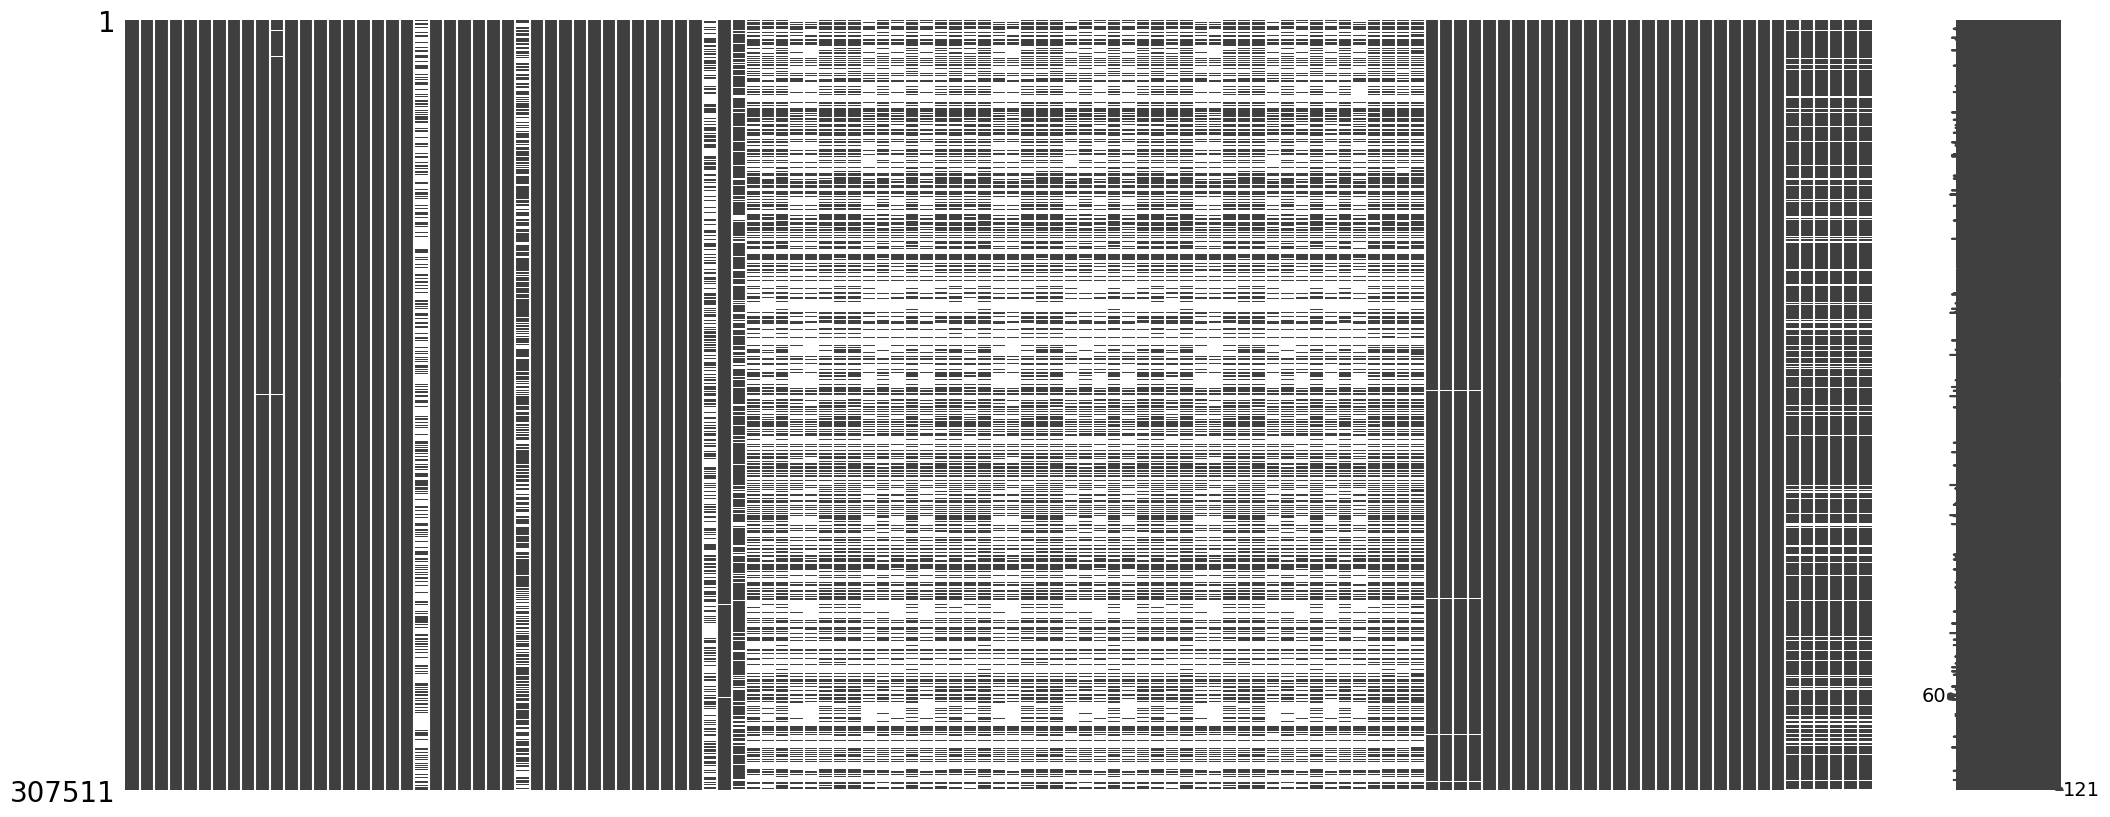

In [ ]:
# plotting missing value menggunakan matrix
msno.matrix(train)
plt.show()

Berdasarkan visualisasi di atas, diketahui bahwa terdapat pola pada missing value fitur. Asumsi awal terdapat korelasi missing value satu fitur terhadap fitur lainnya.

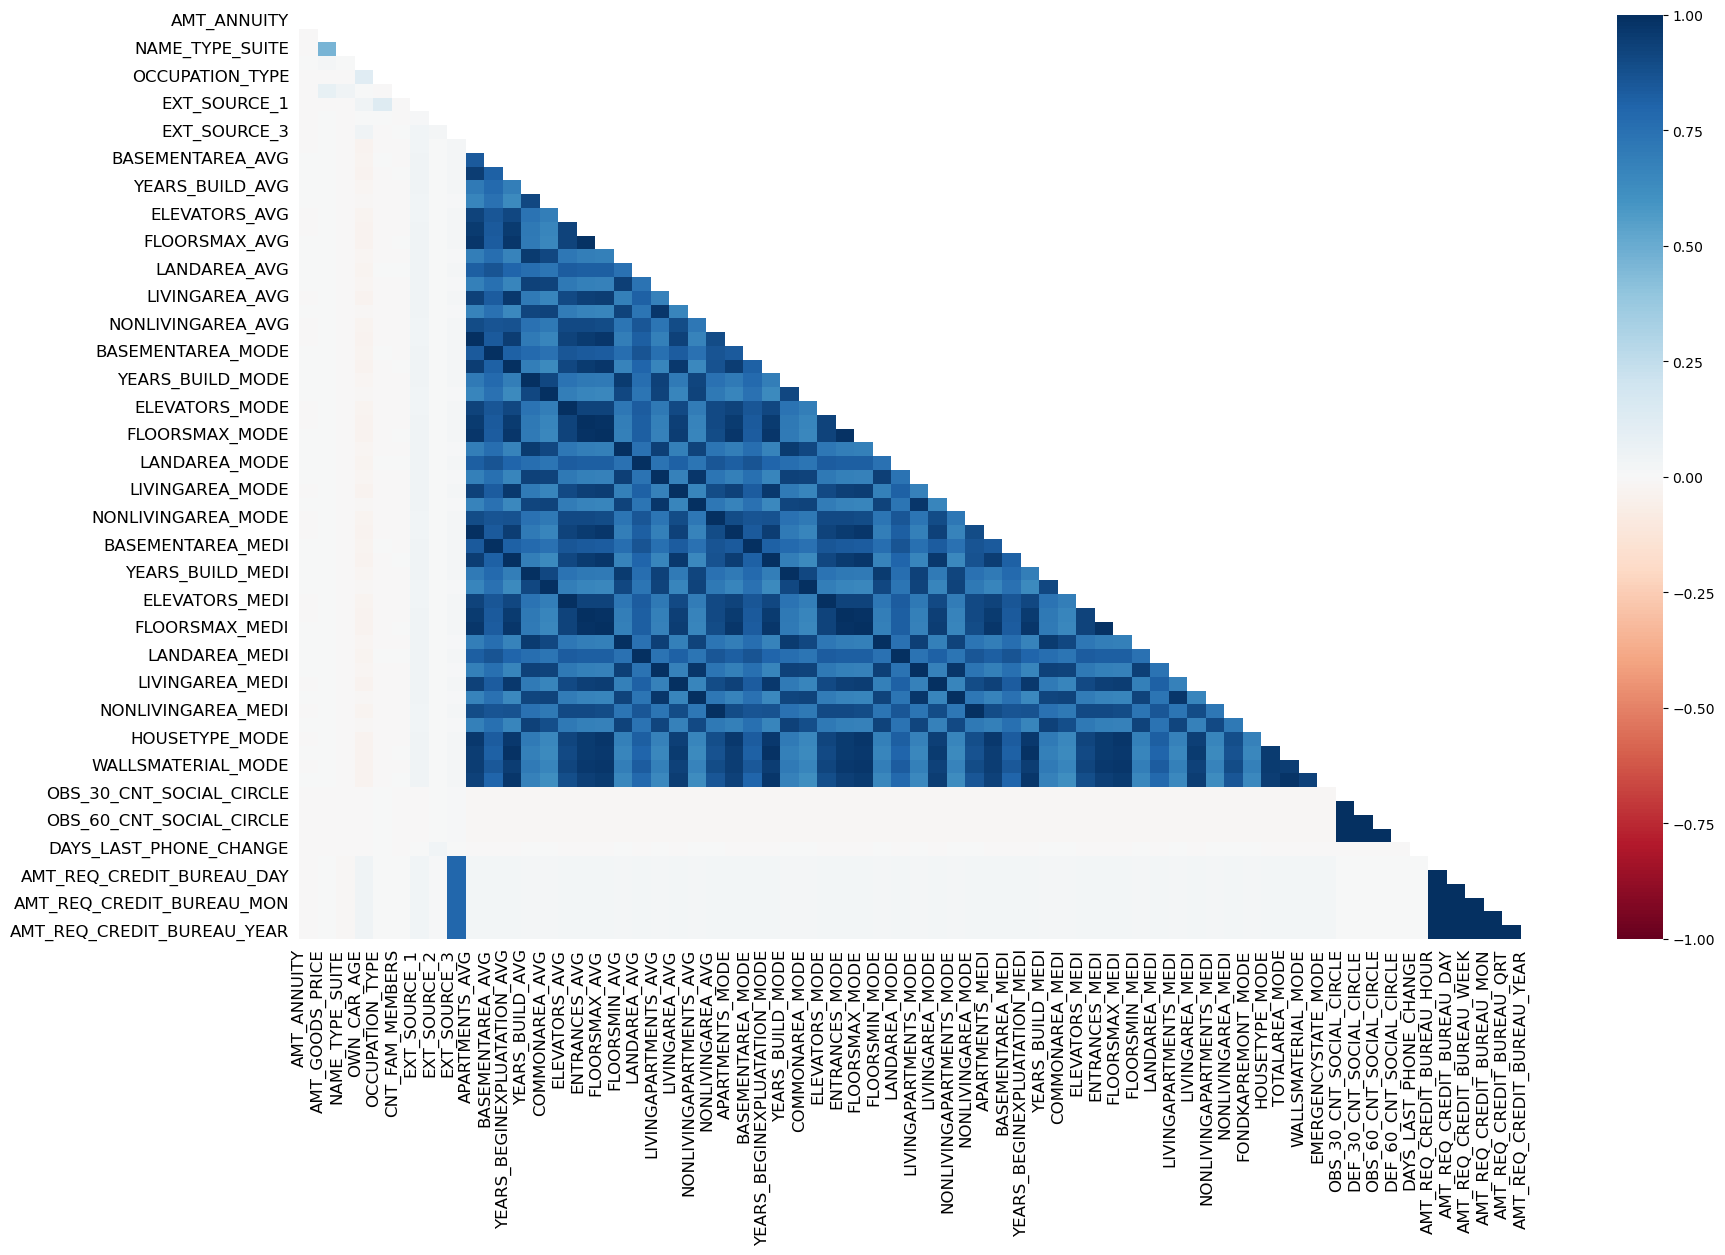

In [ ]:
# ambil fitur yang memiliki missing value
missing_data = train.columns[train.isnull().any()]

# plotting heatmap missing value
g = msno.heatmap(train[missing_data], fontsize=12, labels=False)
g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.show()

Heatmap di atas menunjukkan korelasi missing value antarfitur. Hasilnya terdapat beberapa fitur yang memiliki korelasi missing value tinggi terhadap fitur lainnya.

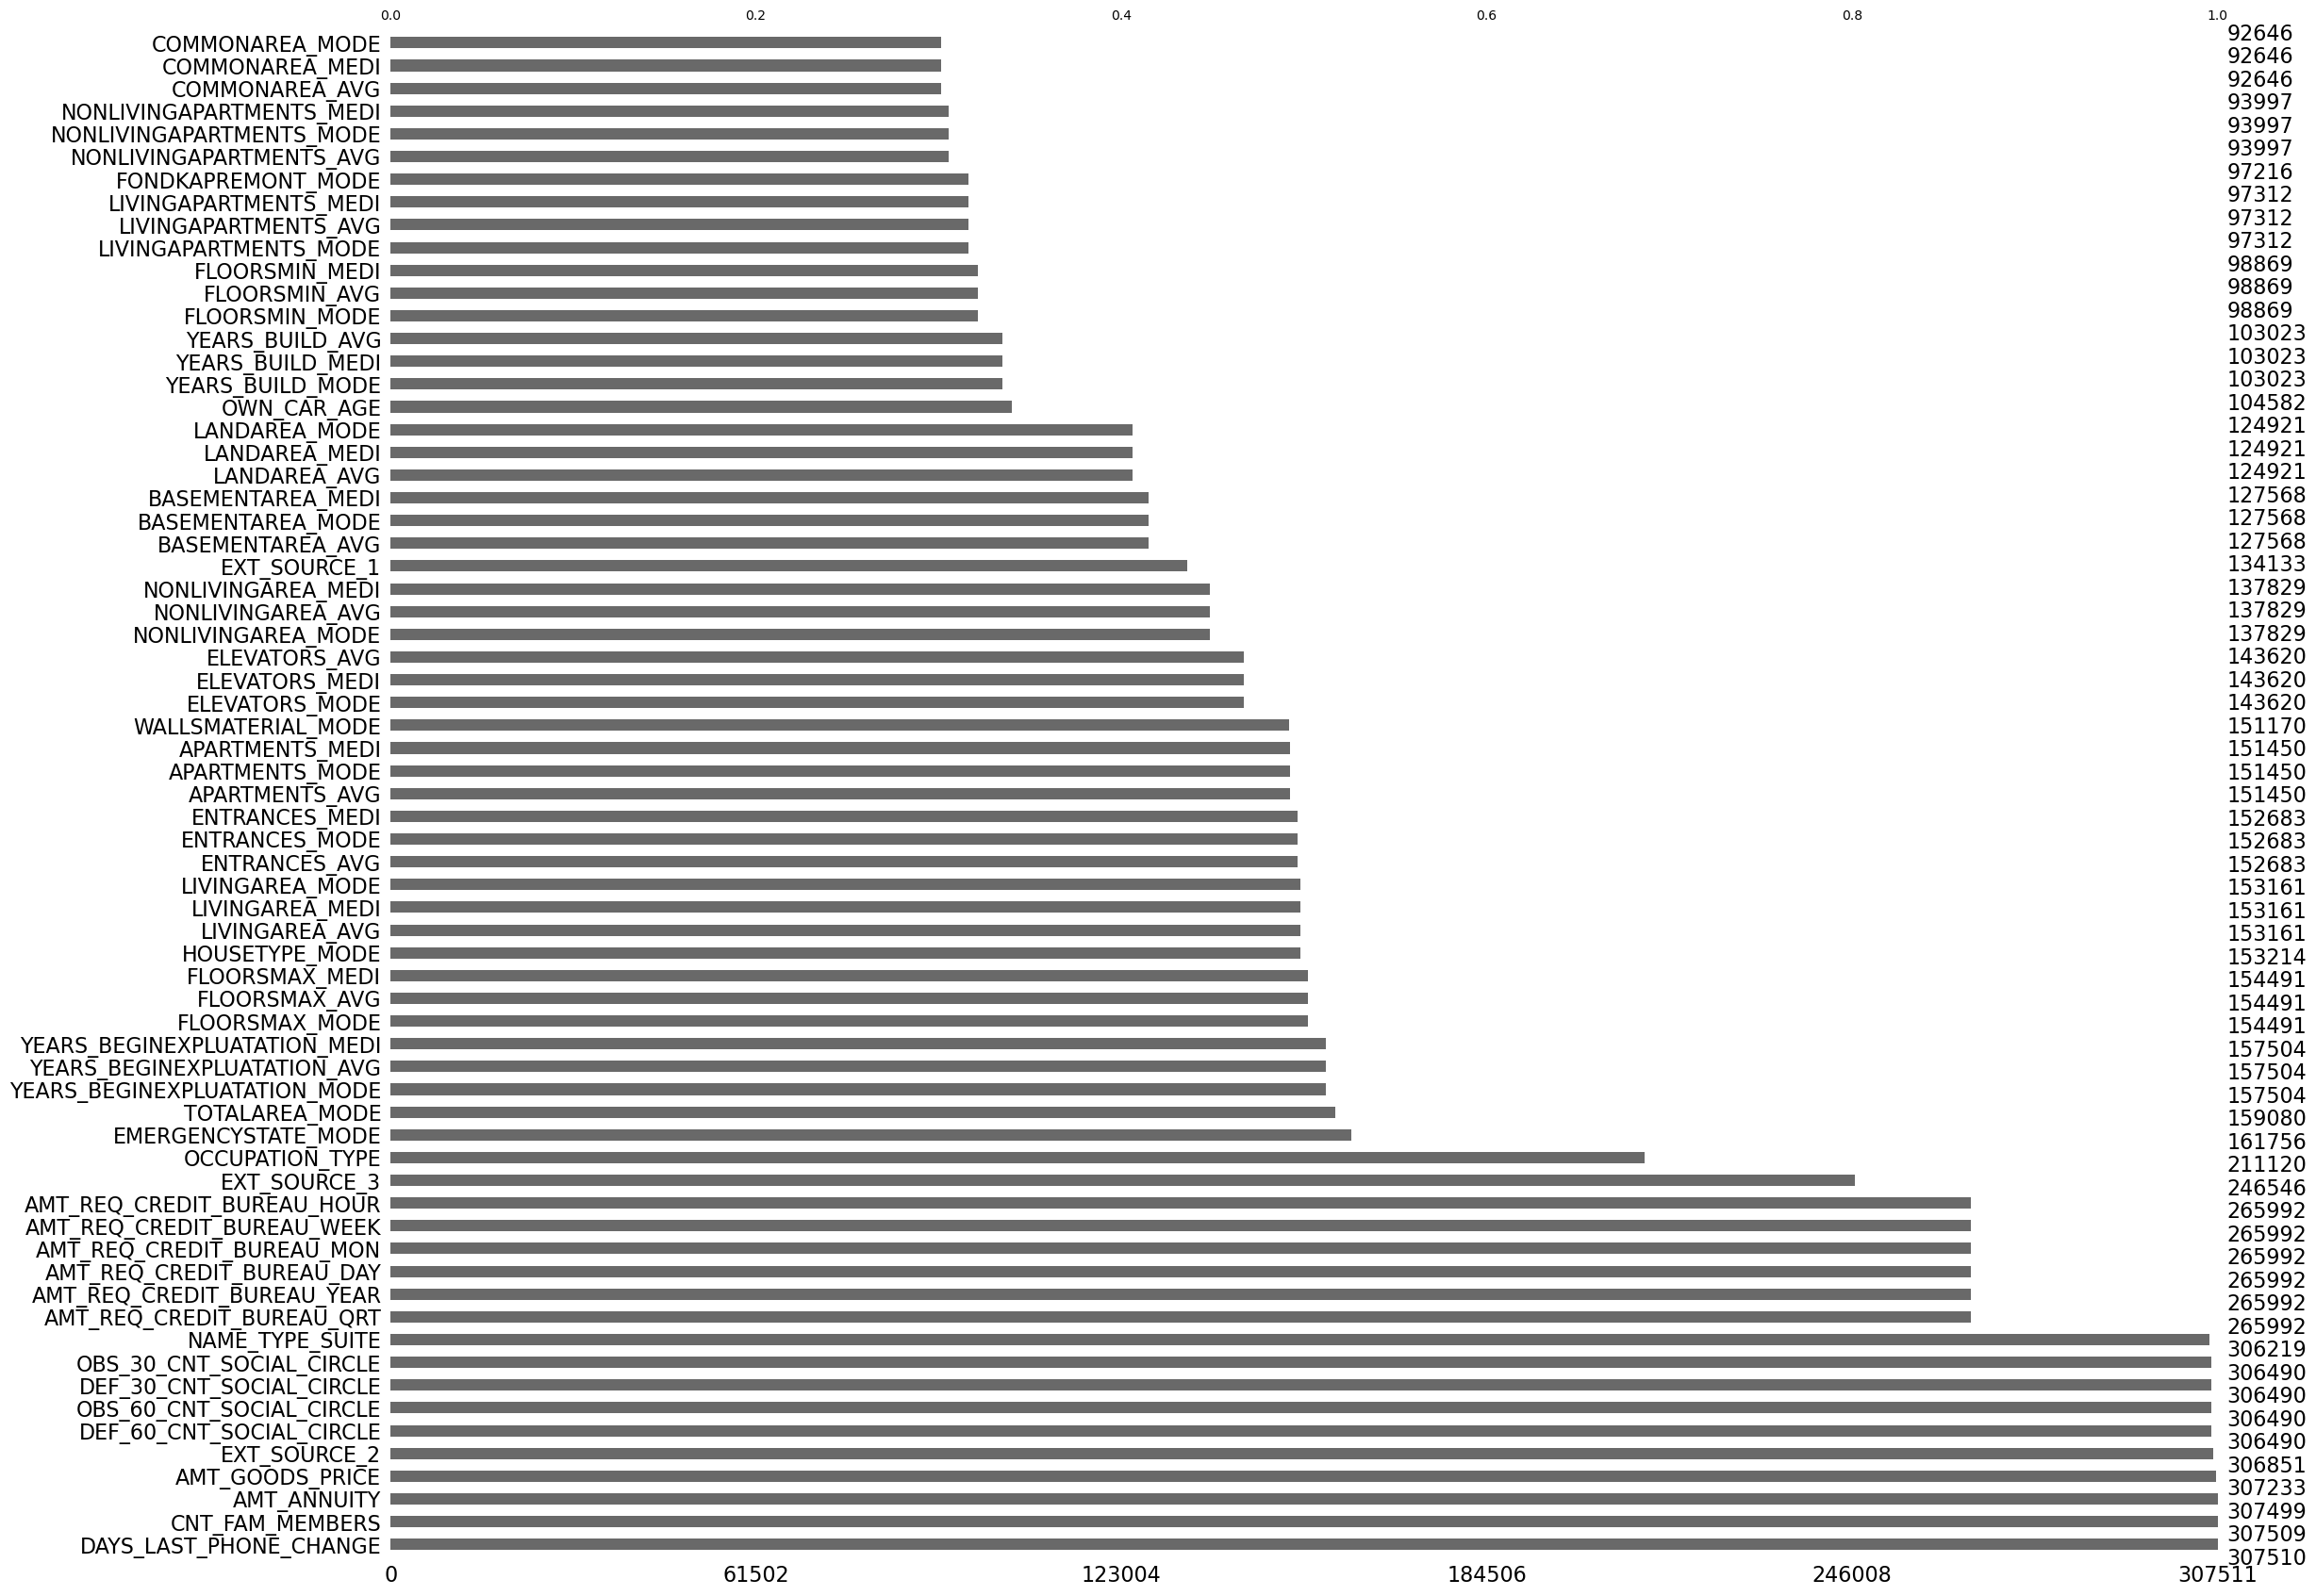

In [ ]:
# plotting jumlah missing value setiap fitur
msno.bar(train[missing_data], sort='descending')
plt.show()

Barplot di atas menunjukkan jumlah missing value pada setiap fitur

#### Hitung Persentase Missing Value Setiap Feature

In [ ]:
# inisialisasi fungsi miss_val_percent untuk hitung persentase missing value pada DataFrame
def miss_val_percent(data):

    # ambil kolom dengan missing value, jumlahkan missing value
    null_cols = data.columns[data.isnull().any()]
    miss_val_sum = data[null_cols].isnull().sum()

    # ubah menjadi DataFrame, ubah index menjadi 'feature'
    miss_val_df = pd.DataFrame(miss_val_sum, columns=['missing_values'])
    miss_val_df.index.name = 'feature'

    # hitung persentase missing value setiap feature, sorting dan reset index
    miss_val_df['percent'] = miss_val_df['missing_values']. \
    apply(lambda row: round((row / data.shape[0]) * 100, 2)).astype(int)
    miss_val_df.sort_values(by='percent', ascending=False, inplace=True)
    miss_val_df.reset_index(inplace=True)

    return miss_val_df

# apply fungsi untuk hitung persentase missing value
missing_data = miss_val_percent(train)
missing_data.head()

,feature,missing_values,percent
0,COMMONAREA_MEDI,214865,69
1,NONLIVINGAPARTMENTS_MEDI,213514,69
2,NONLIVINGAPARTMENTS_MODE,213514,69
3,NONLIVINGAPARTMENTS_AVG,213514,69
4,COMMONAREA_AVG,214865,69


In [ ]:
# cek jumlah feature dengan missing value
missing_data.shape[0]

67

#### Drop Fitur Dataset dengan Threshold Missing Value 65%

In [ ]:
# inisialisasi prosedur drop_cols untuk drop fitur dengan threshold missing value
def drop_cols(data1, data2, threshold):
    columns = data2[data2['percent'] >= threshold]['feature'].tolist()
    data1.drop(columns, axis=1, inplace=True)

# apply prosedur untuk drop fitur dengan threshold 65%
drop_cols(train, missing_data, 65)

train.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=104)

In [ ]:
# cek persentase missing value
missing_data = miss_val_percent(train)
missing_data

,feature,missing_values,percent
0,LANDAREA_AVG,182590,59
1,LANDAREA_MODE,182590,59
2,LANDAREA_MEDI,182590,59
3,BASEMENTAREA_AVG,179943,58
4,BASEMENTAREA_MODE,179943,58
5,BASEMENTAREA_MEDI,179943,58
6,EXT_SOURCE_1,173378,56
7,NONLIVINGAREA_MEDI,169682,55
8,NONLIVINGAREA_AVG,169682,55
9,NONLIVINGAREA_MODE,169682,55


In [ ]:
train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# tampilkan jumlah fitur yang memiliki missing value
train.isnull().any().sum()

50

#### Manual Handling

In [ ]:
# inisialisasi fungsi untuk handling missing value pada fitur secara manual
def manual_handling(data):

    # handling fitur kategori
    data['NAME_FAMILY_STATUS'].fillna('Data Not Available', inplace=True)
    data['NAME_HOUSING_TYPE'].fillna('Data Not Available', inplace=True)
    data['FLAG_MOBIL'].fillna('Data Not Available', inplace=True)
    data['FLAG_EMP_PHONE'].fillna('Data Not Available', inplace=True)
    data['FLAG_CONT_MOBILE'].fillna('Data Not Available', inplace=True)
    data['FLAG_EMAIL'].fillna('Data Not Available', inplace=True)
    data['OCCUPATION_TYPE'].fillna('Data Not Available', inplace=True)
    data['NAME_FAMILY_STATUS'].replace('Unknown','Married', inplace=True)
    data['CODE_GENDER'].replace('XNA','M',inplace=True)
    data['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)

    # handling fitur numerik
    data['AMT_ANNUITY'].fillna(0, inplace=True)
    data['AMT_GOODS_PRICE'].fillna(0, inplace=True)
    data['CNT_FAM_MEMBERS'].fillna(data['CNT_FAM_MEMBERS'].value_counts().idxmax(), \
                                             inplace=True)
    data['EXT_SOURCE_1'].fillna(0, inplace=True)
    data['EXT_SOURCE_2'].fillna(0, inplace=True)
    data['EXT_SOURCE_3'].fillna(0, inplace=True)

    # ubah data menjadi positif
    data['DAYS_BIRTH'] = data['DAYS_BIRTH'].abs()
    data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'].abs()
    data['DAYS_REGISTRATION'] = data['DAYS_REGISTRATION'].abs()
    data['DAYS_ID_PUBLISH'] = data['DAYS_ID_PUBLISH'].abs()

    return data

train = manual_handling(train)

In [ ]:
# tampilkan jumlah fitur yang memiliki missing value
train.isnull().any().sum()

42

#### Imputation (Mean, Median, dan Modus)

In [ ]:
# pisahkan fitur kategori dan fitur numerik, jadikan sebagai list
category_cols = train.select_dtypes(include='object'). \
                    columns[train.select_dtypes(include='object').isna().any()].tolist()
numeric_cols = train.select_dtypes(exclude='object') \
                    .columns[train.select_dtypes(exclude='object').isna().any()].tolist()
list_cols = missing_data['feature'].tolist()

In [ ]:
# inisialisasi fungsi compare_lists untuk membandingkan fitur pada missing value
def compare_lists(list1, list2):
    matching_values = [value for value in list1 if value in list2]
    return matching_values

# apply fungsi untuk memisahkan fitur numerik dan fitur kategori yang memiliki missing value
numeric_null_cols = compare_lists(list_cols, numeric_cols)
category_null_cols = compare_lists(list_cols, category_cols)

In [ ]:
# inisalisasi fungsi impute_numeric_data untuk imputasi data numerik
def impute_numeric_data(data, columns, mode):
    # looping untuk setiap fitur kemudian isi missing value dengan median atau mean
    for col in columns:
        if mode == 'median':
            value = data[col].median()
        elif mode == 'mean':
            value = data[col].mean()
        data[col].fillna(value, inplace=True)

    return data

# inisalisasi fungsi impute_categoric_data untuk imputasi data kategori
def impute_categoric_data(data, columns):
   # looping untuk setiap fitur kemudian isi missing value dengan modus
    for col in columns:
        mode_value = data[col].mode().iloc[0]
        data[col].fillna(mode_value, inplace=True)
    return data

# apply fungsi untuk imputasi data numerik dengan median dan kategorik dengan modus
impute_numeric_data(train, numeric_null_cols, 'median')
impute_categoric_data(train, category_null_cols)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307507,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307508,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# tampilkan jumlah fitur yang memiliki missing value
train.isnull().any().sum()

0

In [ ]:
# tampilkan nama fitur yang memiliki missing value
train.columns[train.isnull().any()]

Index([], dtype='object')

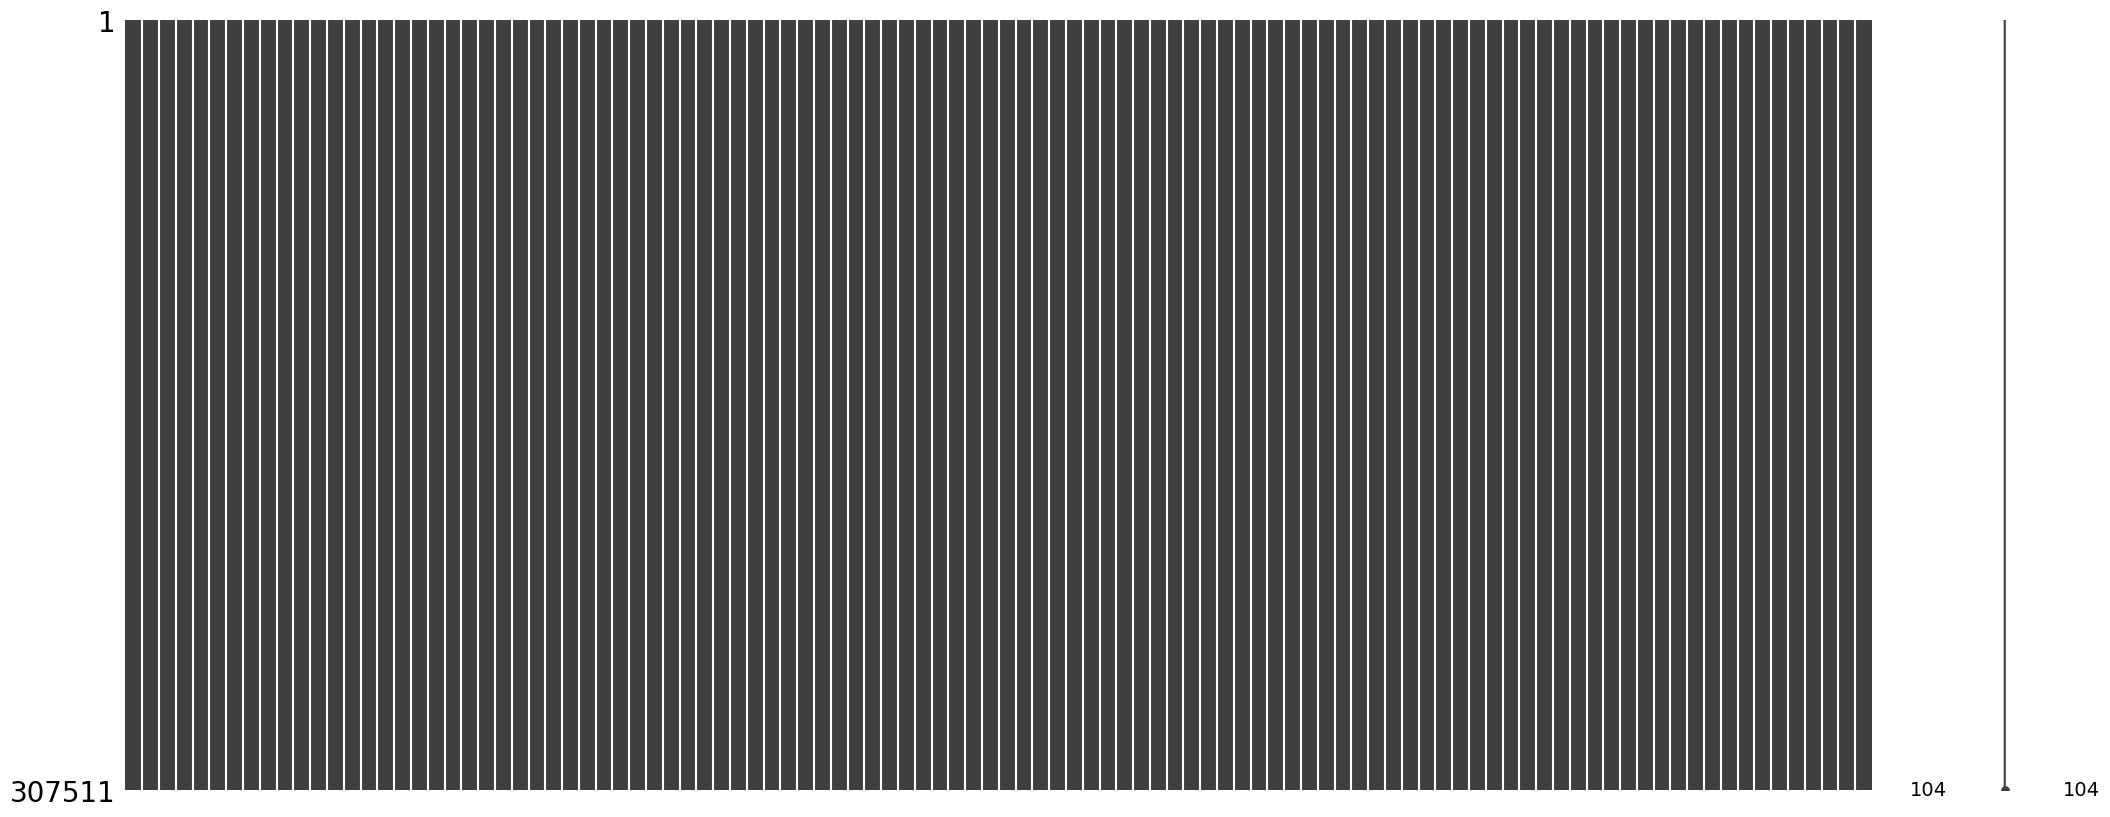

In [ ]:
# plotting missing value menggunakan matrix
msno.matrix(train)
plt.show()

In [ ]:
# print jumlah fitur dan sampel pada dat
print(train.shape)

(307511, 104)


### Feature Engineering

In [ ]:
# inisialisasi fungsi feature_engineering
def feature_engineering(data):

    data['CREDIT_INCOME_PERCENT'] = data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
    data['ANNUITY_INCOME_PERCENT'] = data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
    data['FAMILY_CNT_INCOME_PERCENT'] = data['AMT_INCOME_TOTAL'] / data['CNT_FAM_MEMBERS']
    data['CREDIT_TERM'] = data['AMT_ANNUITY'] / data['AMT_CREDIT']
    data['BIRTH_EMPLOYED_PERCENT'] = data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']

    data['AGE_CLIENT'] = data['DAYS_BIRTH'] / 365
    data['AGE_CLIENT'] = data['AGE_CLIENT'].round().abs().astype(int)

    data['CREDIT_GOODS_DIFF'] = data['AMT_CREDIT'] - data['AMT_GOODS_PRICE']
    data['ID_REGISTRATION_DIFF'] = data['DAYS_ID_PUBLISH'] - data['DAYS_REGISTRATION']

    # data['CREDIT_ANNUITY_PERCENT'] = data['AMT_CREDIT'] / data['AMT_ANNUITY']
    # data['EMPLOYED_REGISTRATION_PERCENT'] = data['DAYS_EMPLOYED'] / data['DAYS_REGISTRATION']
    # data['BIRTH_REGISTRATION_PERCENT'] = data['DAYS_BIRTH'] / data['DAYS_REGISTRATION']
    # data['ANNUITY_LENGTH_EMPLOYED_PERCENT'] = data['CREDIT_TERM']/ data['DAYS_EMPLOYED']
    # data['ANNUITY_LENGTH_EMPLOYED_PERCENT'] = data['ANNUITY_LENGTH_EMPLOYED_PERCENT'].astype('float128')
    # data['AGE_LOAN_FINISH'] = data['DAYS_BIRTH']*(-1.0/365) + \
    #                      (data['AMT_CREDIT']/data['AMT_ANNUITY']) *(1.0/12)

    data['PHONE_CHANGE_BIRTH_PERCENT'] = data['DAYS_LAST_PHONE_CHANGE']/data['DAYS_BIRTH']


    income_by_contract = data[['AMT_INCOME_TOTAL', 'NAME_CONTRACT_TYPE']].groupby('NAME_CONTRACT_TYPE').median()['AMT_INCOME_TOTAL']
    data['MEDIAN_INCOME_CONTRACT_TYPE'] = data['NAME_CONTRACT_TYPE'].map(income_by_contract)

    income_by_suite = data[['AMT_INCOME_TOTAL', 'NAME_TYPE_SUITE']].groupby('NAME_TYPE_SUITE').median()['AMT_INCOME_TOTAL']
    data['MEDIAN_INCOME_SUITE_TYPE'] = data['NAME_TYPE_SUITE'].map(income_by_suite)

    income_by_housing = data[['AMT_INCOME_TOTAL', 'NAME_HOUSING_TYPE']].groupby('NAME_HOUSING_TYPE').median()['AMT_INCOME_TOTAL']
    data['MEDIAN_INCOME_HOUSING_TYPE'] = data['NAME_HOUSING_TYPE'].map(income_by_housing)

    income_by_org = data[['AMT_INCOME_TOTAL', 'ORGANIZATION_TYPE']].groupby('ORGANIZATION_TYPE').median()['AMT_INCOME_TOTAL']
    data['MEDIAN_INCOME_ORG_TYPE'] = data['ORGANIZATION_TYPE'].map(income_by_org)

    income_by_occu = data[['AMT_INCOME_TOTAL', 'OCCUPATION_TYPE']].groupby('OCCUPATION_TYPE').median()['AMT_INCOME_TOTAL']
    data['MEDIAN_INCOME_OCCU_TYPE'] = data['OCCUPATION_TYPE'].map(income_by_occu)

    income_by_education = data[['AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE']].groupby('NAME_EDUCATION_TYPE').median()['AMT_INCOME_TOTAL']
    data['MEDIAN_INCOME_EDU_TYPE'] = data['NAME_EDUCATION_TYPE'].map(income_by_education)

    data['ORG_TYPE_INCOME_PERCENT'] = data['MEDIAN_INCOME_ORG_TYPE']/data['AMT_INCOME_TOTAL']
    data['OCCU_TYPE_INCOME_PERCENT'] = data['MEDIAN_INCOME_OCCU_TYPE']/data['AMT_INCOME_TOTAL']
    data['EDU_TYPE_INCOME_PERCENT'] = data['MEDIAN_INCOME_EDU_TYPE']/data['AMT_INCOME_TOTAL']

    return data

# apply fungsi feature_engineering serta print jumlah fitur dan sampel
train = feature_engineering(train)
df = feature_engineering(df)
print(train.shape)

(307511, 122)


In [ ]:
train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,PHONE_CHANGE_BIRTH_PERCENT,MEDIAN_INCOME_CONTRACT_TYPE,MEDIAN_INCOME_SUITE_TYPE,MEDIAN_INCOME_HOUSING_TYPE,MEDIAN_INCOME_ORG_TYPE,MEDIAN_INCOME_OCCU_TYPE,MEDIAN_INCOME_EDU_TYPE,ORG_TYPE_INCOME_PERCENT,OCCU_TYPE_INCOME_PERCENT,EDU_TYPE_INCOME_PERCENT
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,-0.119860,153000.0,153000.0,148500.0,157500.0,157500.0,135000.0,0.777778,0.777778,0.666667
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,-0.049389,153000.0,144000.0,148500.0,135000.0,157500.0,180000.0,0.500000,0.583333,0.666667
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,-0.042791,135000.0,153000.0,148500.0,135000.0,157500.0,135000.0,2.000000,2.333333,2.000000
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,-0.032465,153000.0,153000.0,148500.0,157500.0,157500.0,135000.0,1.166667,1.166667,1.000000
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,-0.055489,153000.0,153000.0,148500.0,162000.0,157500.0,135000.0,1.333333,1.296296,1.111111


In [ ]:
# tampilkan jumlah fitur yang memiliki missing value
train.isnull().any().sum()

0

In [ ]:
# tampilkan nama fitur yang memiliki missing value
train.columns[train.isnull().any()]

Index([], dtype='object')

### Encoding

In [ ]:
# ambil fitur kategori
categoric = [i for i in train.columns if train[i].dtype == 'object' and i != 'TARGET']

# looping untuk print nilai kategori setiap fitur kategori
for col in categoric:
  print(train[col].value_counts())
  print()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

F    202448
M    105063
Name: CODE_GENDER, dtype: int64

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, 

In [ ]:
train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,PHONE_CHANGE_BIRTH_PERCENT,MEDIAN_INCOME_CONTRACT_TYPE,MEDIAN_INCOME_SUITE_TYPE,MEDIAN_INCOME_HOUSING_TYPE,MEDIAN_INCOME_ORG_TYPE,MEDIAN_INCOME_OCCU_TYPE,MEDIAN_INCOME_EDU_TYPE,ORG_TYPE_INCOME_PERCENT,OCCU_TYPE_INCOME_PERCENT,EDU_TYPE_INCOME_PERCENT
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,-0.119860,153000.0,153000.0,148500.0,157500.0,157500.0,135000.0,0.777778,0.777778,0.666667
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,-0.049389,153000.0,144000.0,148500.0,135000.0,157500.0,180000.0,0.500000,0.583333,0.666667
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,-0.042791,135000.0,153000.0,148500.0,135000.0,157500.0,135000.0,2.000000,2.333333,2.000000
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,-0.032465,153000.0,153000.0,148500.0,157500.0,157500.0,135000.0,1.166667,1.166667,1.000000
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,-0.055489,153000.0,153000.0,148500.0,162000.0,157500.0,135000.0,1.333333,1.296296,1.111111


In [ ]:
# import library untuk OHE dan Ordinal Encoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# inisialiasi prosedur untuk encode fitur kategori dengan 3 metode, One-Hot Encoding, Ordinal Encoding
def encode_data(data, columns, method):
    encoded_data = data.copy()

    # OHE encoding
    if method == 'OHE':
        ohe = OneHotEncoder(sparse=False, drop='first')
        encoded_columns = pd.DataFrame(ohe.fit_transform(data[columns]))
        encoded_columns.columns = ohe.get_feature_names_out(columns)

    # ordinal encoding
    elif method == 'ordinal':
        ordinal_enc = OrdinalEncoder()
        encoded_columns = pd.DataFrame(ordinal_enc.fit_transform(data[columns]), columns=columns)

    # frequency encoding
    elif method == 'frequency':
        encoded_columns = pd.DataFrame()
        for column in columns:
            freq_encoding = data[column].value_counts(normalize=True).to_dict()
            encoded_columns[column] = data[column].map(freq_encoding)

    # hapus fitur dan concat data
    encoded_data.drop(columns=columns, inplace=True)
    encoded_data = pd.concat([encoded_data, encoded_columns], axis=1)

    return encoded_data

In [ ]:
# insialisasi fitur yang di-encode menggunakan One-Hot Encoding, di-encode menggunakan Ordinal Encoding
# di-encode menggunakan Frequency Encoding
OHE_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE']
ordinal_columns = ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                  'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']
frequency_columns = ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

# apply fungsi untuk encode dengan ketiga metode
train = encode_data(train, OHE_columns, method='OHE')
train = encode_data(train, ordinal_columns, method='ordinal')
train = encode_data(train, frequency_columns, method='frequency')

In [ ]:
train.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,HOUSETYPE_MODE,WALLSMATERIAL_MODE,OCCUPATION_TYPE,ORGANIZATION_TYPE
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,...,6.0,7.0,4.0,3.0,1.0,6.0,0.0,5.0,0.179460,0.221104
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,...,1.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0,0.089655,0.028919
2,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,...,6.0,7.0,4.0,3.0,1.0,1.0,0.0,4.0,0.179460,0.033833
3,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,...,6.0,7.0,4.0,0.0,1.0,6.0,0.0,4.0,0.179460,0.221104
4,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,...,6.0,7.0,4.0,3.0,1.0,4.0,0.0,4.0,0.089655,0.000276


In [ ]:
# tampilkan jumlah fitur dan sampel
train.shape

(307511, 122)

In [ ]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,PHONE_CHANGE_BIRTH_PERCENT,MEDIAN_INCOME_CONTRACT_TYPE,MEDIAN_INCOME_SUITE_TYPE,MEDIAN_INCOME_HOUSING_TYPE,MEDIAN_INCOME_ORG_TYPE,MEDIAN_INCOME_OCCU_TYPE,MEDIAN_INCOME_EDU_TYPE,ORG_TYPE_INCOME_PERCENT,OCCU_TYPE_INCOME_PERCENT,EDU_TYPE_INCOME_PERCENT
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0.119860,153000.0,153000.0,148500.0,157500.0,157500.0,135000.0,0.777778,0.777778,0.666667
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0.049389,153000.0,144000.0,148500.0,135000.0,157500.0,180000.0,0.500000,0.583333,0.666667
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0.042791,135000.0,153000.0,148500.0,135000.0,157500.0,135000.0,2.000000,2.333333,2.000000
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0.032465,153000.0,153000.0,148500.0,157500.0,157500.0,135000.0,1.166667,1.166667,1.000000
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0.055489,153000.0,153000.0,148500.0,162000.0,157500.0,135000.0,1.333333,1.296296,1.111111


In [ ]:
# tampilkan jumlah fitur dan sampel
df.shape

(307511, 139)

## Exploratory Data Analysis (EDA)

### Statistical Summary

In [ ]:
# ubah nama fitur menjadi lowercase
df.columns = df.columns.str.lower()

# pisahkan fitur kategori dan numerik
category = [i for i in df.columns if df[i].dtype == 'object' and i != 'TARGET']
numerical = [i for i in df.columns if df[i].dtype != 'object']

#### Category Data

In [ ]:
# looping untuk print jumlah masing-masing kategori pada fitur
for col in category:
  print(df[col].value_counts())
  print()

Cash loans         278232
Revolving loans     29279
Name: name_contract_type, dtype: int64

F      202448
M      105059
XNA         4
Name: code_gender, dtype: int64

N    202924
Y    104587
Name: flag_own_car, dtype: int64

Y    213312
N     94199
Name: flag_own_realty, dtype: int64

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: name_type_suite, dtype: int64

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: name_income_type, dtype: int64

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: nam

#### Numerical Data

In [ ]:
# tampilkan informasi statistik fitur numerik
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
target,307511.0,0.080729,0.272419,0.000000,0.000000,0.0,0.000000,1.000000e+00
cnt_children,307511.0,0.417052,0.722121,0.000000,0.000000,0.0,1.000000,1.900000e+01
amt_income_total,307511.0,168797.919297,237123.146279,25650.000000,112500.000000,147150.0,202500.000000,1.170000e+08
amt_credit,307511.0,599025.999706,402490.776996,45000.000000,270000.000000,513531.0,808650.000000,4.050000e+06
amt_annuity,307499.0,27108.573909,14493.737315,1615.500000,16524.000000,24903.0,34596.000000,2.580255e+05
...,...,...,...,...,...,...,...,...
median_income_occu_type,211120.0,159871.019562,27007.642649,112500.000000,135000.000000,157500.0,157500.000000,2.250000e+05
median_income_edu_type,307511.0,146468.706810,19691.997931,112500.000000,135000.000000,135000.0,157500.000000,2.115000e+05
org_type_income_percent,307511.0,1.085680,0.523986,0.001346,0.714286,1.0,1.333333,6.153846e+00
occu_type_income_percent,211120.0,1.118077,0.516708,0.001346,0.760870,1.0,1.400000,8.333333e+00


### Univariate Analysis

In [ ]:
"""
    Deskripsi Parameter:

    - data: data yang digunakan
    - column: variabel pengamatan
    - hue: variabel ketiga (pembeda kategori)
    - lable: label variabel pengamatan
    - max_sample: jumlah maksimal bar yang ingin ditampilkan
    - num_x_ticks: jumlah xticks yang ingin di-custom
    - x_ticks: list nama xticks yang ingin di-custom
    - width: lebar chart
    - height: tinggi chart
    - y_title: jarak antara title dengan judul
    - orient: orientasi plot (vertikal atau horizontal)
    - title: judul chart
"""

# fungsi countplot_univariate untuk plotting countplot univariate
def countplot_univariate(data, column, hue, label, max_sample, num_x_ticks, x_ticks, width, height, y_title, orient, title):

    # set lebar, tinggi dan judul chart
    plt.figure(figsize=(width, height))
    plt.suptitle(f'{title}', y=y_title)

    # percabangan parameter orient untuk plotting vertikal
    if orient == 'vertical':
        if max_sample == 0:
            g = sns.countplot(x=column, hue=hue, order=df[column].value_counts().index, \
                          data=data, palette='muted')
        else:
            g = sns.countplot(x=column, hue=hue, order=df[column].value_counts().nlargest(max_sample).index, \
                          data=data, palette='muted')
        g.set(xlabel=label, ylabel='Jumlah')

    # percabangan parameter orient untuk plotting horizontal
    elif orient == 'horizontal':
        if max_sample == 0:
            g = sns.countplot(y=column, hue=hue, order=df[column].value_counts().index, \
                          data=data, palette='muted')
        else:
            g = sns.countplot(y=column, hue=hue, order=df[column].value_counts().nlargest(max_sample).index, \
                          data=data, palette='muted')
        g.set(xlabel='Jumlah', ylabel=label)

    # ubah setting label
    plt.legend(title='Target', labels=['Non-default', 'Default'], fontsize=11)

    # kondisi untuk pemilihan x_ticks
    if num_x_ticks == 0:
        pass
    else:
        x_ticks_list = list(range(num_x_ticks))
        plt.xticks(x_ticks_list, x_ticks, fontsize=11)

    # ambil total
    total = len(df[column])

    # percabangan untuk annotate persentase chart vertikal
    if orient == 'vertical':
        for p in g.patches:
            height = p.get_height()
            percentage = (height / total) * 100
            g.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height + 3000), \
                            ha='center', va='bottom', fontsize=12)
    # percabangan untuk annotate persentase chart horizontal
    elif orient == 'horizontal':
        for p in g.patches:
            width = p.get_width()
            percentage = (width / total) * 100
            g.annotate(f'{percentage:.1f}%', (width + 1000, p.get_y() + p.get_height() / 2), \
                       ha='left', va='center', fontsize=11)

    plt.show()

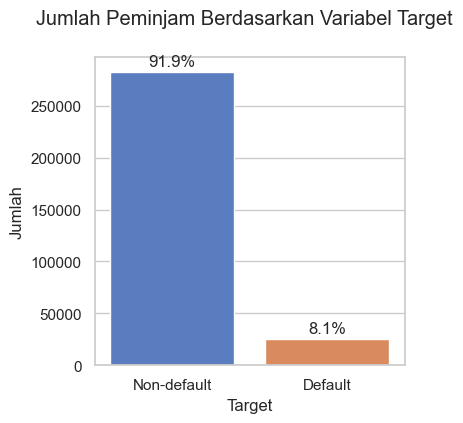

In [ ]:
sns.set_theme(style="whitegrid")

chart = 'Jumlah Peminjam Berdasarkan Variabel Target'

plt.figure(figsize=(4, 4))
plt.suptitle(f'{chart}', y=1)

# plotting countplot untuk jumlah peminjam berdasarkan variabel target, kustomisasi xlabel, ylabel, dan xticks
g = sns.countplot(x='target', data=df, palette='muted')
g.set(ylabel='Jumlah', xlabel='Target')
plt.xticks([0, 1], ['Non-default', 'Default'], fontsize=11)

# annotate persentase chart
total = len(df['target'])
for p in g.patches:
            height = p.get_height()
            percentage = (height / total) * 100
            g.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height + 3000), \
                            ha='center', va='bottom', fontsize=12)

plt.show()

Chart di atas menunjukkan distribusi variabel target, diketahui jumlah peminjam yang gagal bayar (*default*) berjumlah 8,1% dari jumlah keseluruhan peminjam. Disimpulkan bahwa terdapat ketidakseimbangan data pada variabel target.

**Keterangan:**

*   Default	= Gagal bayar
*   Non-default	= Tidak gagal bayar

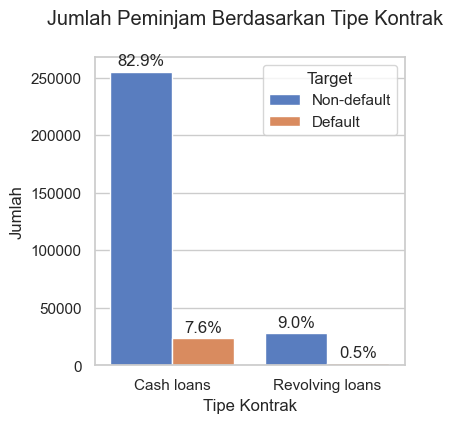

In [ ]:
# inisialisasi judul chart
chart = 'Jumlah Peminjam Berdasarkan Tipe Kontrak'

# apply prosedur untuk plotting chart
countplot_univariate(df, 'name_contract_type', 'target', 'Tipe Kontrak', 0, 0, None, 4, 4, 1, 'vertical', chart)

Chart di atas menunjukkan distribusi variabel target berdasarkan tipe kontrak. Tipe kontrak *cash loans* merupakan tipe kontrak yang paling banyak gagal bayar (*default*) dengan persentase sebesar 7,6%. Sedangkan persentase gagal bayar tipe kontrak *revolving loans* sebesar 0,5%.

**Keterangan:**

*   Default	= Gagal bayar
*   Non-default	= Tidak gagal bayar

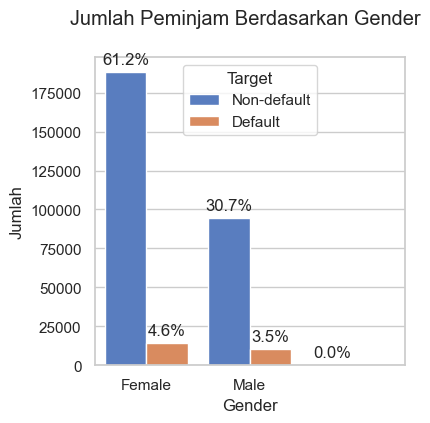

In [ ]:
# inisialisasi judul chart
chart = 'Jumlah Peminjam Berdasarkan Gender'

# apply prosedur untuk plotting chart
countplot_univariate(df, 'code_gender', 'target', 'Gender', 0, 2, ['Female', 'Male'], \
                     4, 4, 1, 'vertical', chart)

Chart di atas menunjukkan distribusi variabel target berdasarkan gender. Perempuan lebih banyak gagal bayar (*default*) dengan persentase sebesar 4,6%. Sementara, persentase gagal bayar laki-laki sebesar 3,5%.

**Keterangan:**

*   Default	= Gagal bayar
*   Non-default	= Tidak gagal bayar

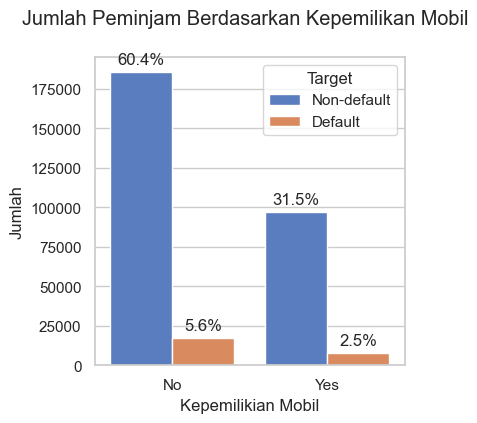

In [ ]:
# inisialisasi judul chart
chart = 'Jumlah Peminjam Berdasarkan Kepemilikan Mobil'

# apply prosedur untuk plotting chart
countplot_univariate(df, 'flag_own_car', 'target', 'Kepemilikian Mobil', 0, 2, ['No', 'Yes'], 4, 4, 1, \
                     'vertical', chart)

Chart di atas menunjukkan distribusi variabel target berdasarkan kepemilikan mobil. Peminjam yang tidak memiliki mobil lebih banyak gagal bayar (*default*) dengan persentase sebesar 5,6%. Sementara, persentase gagal bayar yang memiliki mobil sebesar 2,5%.

**Keterangan:**

*   Default	= Gagal bayar
*   Non-default	= Tidak gagal bayar

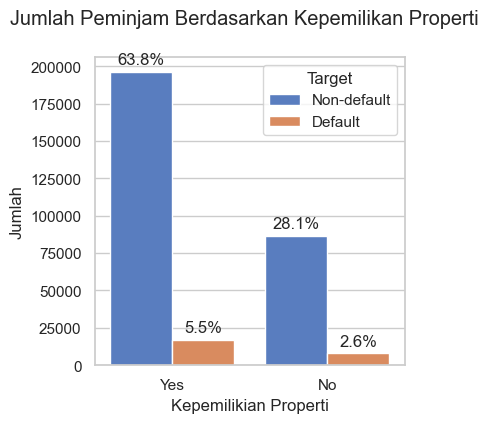

In [ ]:
# inisialisasi judul chart
chart = 'Jumlah Peminjam Berdasarkan Kepemilikan Properti'

# apply prosedur untuk plotting chart
countplot_univariate(df, 'flag_own_realty', 'target', 'Kepemilikian Properti', 0, 2, ['Yes', 'No'], 4, 4, 1, \
                     'vertical', chart)

Chart di atas menunjukkan distribusi variabel target berdasarkan kepemilikan properti. Peminjam yang memiliki properti lebih banyak gagal bayar (*default*) dengan persentase sebesar 5,5%. Sementara, persentase gagal bayar yang tidak memiliki properti sebesar 2,6%.

**Keterangan:**

*   Default	= Gagal bayar
*   Non-default	= Tidak gagal bayar

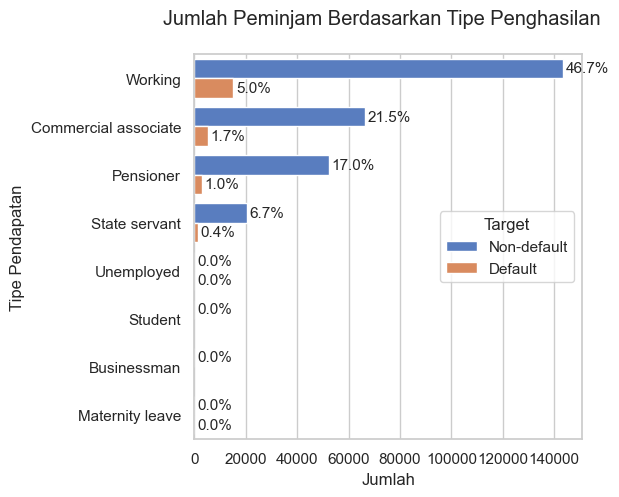

In [ ]:
# inisialisasi judul chart
chart = 'Jumlah Peminjam Berdasarkan Tipe Penghasilan'

# apply prosedur untuk plotting chart
countplot_univariate(df, 'name_income_type', 'target', 'Tipe Pendapatan', 0, 0, None, 5, 5, 0.97, \
                     'horizontal', chart)

Chart di atas menunjukkan distribusi variabel target berdasarkan tipe penghasilan. Tipe penghasilan yang dari bekerja paling banyak gagal bayar (*default*) dengan persentase 5%. Diikuti oleh asosiasi komersial 1,7% dan pensiunan 1%.

**Keterangan:**

*   Default	= Gagal bayar
*   Non-default	= Tidak gagal bayar

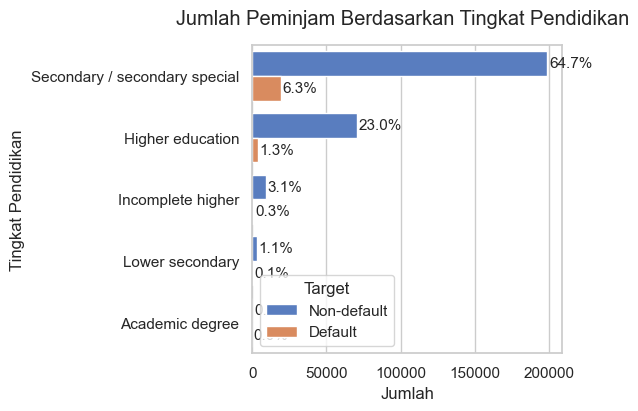

In [ ]:
# inisialisasi judul chart
chart = 'Jumlah Peminjam Berdasarkan Tingkat Pendidikan'

# apply prosedur untuk plotting chart
countplot_univariate(df, 'name_education_type', 'target', 'Tingkat Pendidikan', 0, 0, None, 4, 4, 0.97, \
                     'horizontal', chart)

Chart di atas menunjukkan distribusi variabel target berdasarkan tingkat pendidikan. Peminjam dengan tingkat pendidikan menengah paling banyak gagal bayar (*default*) dengan persentase 6,3%. Diikuti oleh pendidikan tinggi 1,3%, pendidikan yang tidak selesai 0,3%, dan pendidikan rendah.

**Keterangan:**

*   Default	= Gagal bayar
*   Non-default	= Tidak gagal bayar

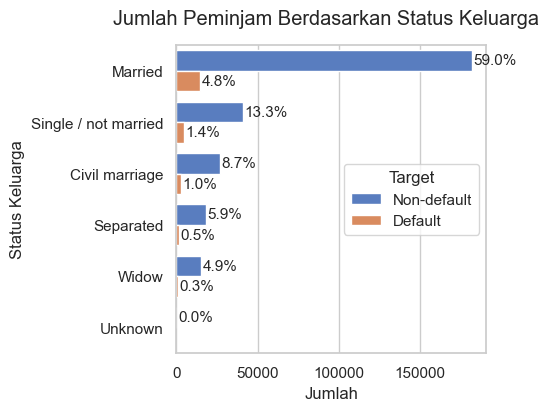

In [ ]:
# inisialisasi judul chart
chart = 'Jumlah Peminjam Berdasarkan Status Keluarga'

# apply prosedur untuk plotting chart
countplot_univariate(df, 'name_family_status', 'target', 'Status Keluarga', 0, 0, None, 4, 4, 0.97, \
                     'horizontal', chart)

Chart di atas menunjukkan distribusi variabel target berdasarkan status keluarga. Peminjam yang sudah berkeluarga paling banyak gagal bayar (*default*) dengan persentase 4,8%. Diikuti oleh peminjam lajang sebesar 1,4% dan pernikahan sipil sebesar 1%.

**Keterangan:**

*   Default	= Gagal bayar
*   Non-default	= Tidak gagal bayar

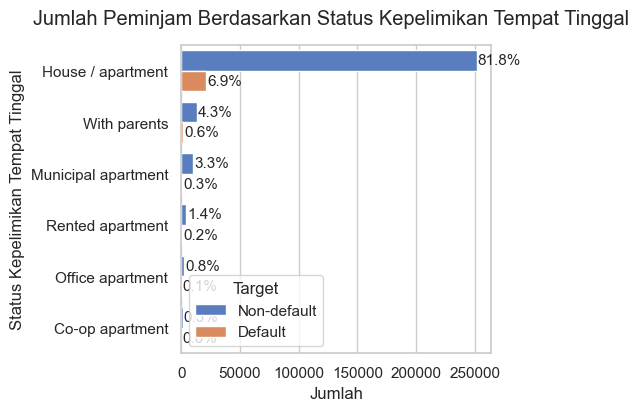

In [ ]:
# inisialisasi judul chart
chart = 'Jumlah Peminjam Berdasarkan Status Kepelimikan Tempat Tinggal'

# apply prosedur untuk plotting chart
countplot_univariate(df, 'name_housing_type', 'target', 'Status Kepelimikan Tempat Tinggal', 0, 0, None, 4, 4, 0.97, \
                     'horizontal', chart)

Chart di atas menunjukkan distribusi variabel target berdasarkan status kepemilikan tempat tinggal. Peminjam yang memiliki rumah atau apartemen paling banyak gagal bayar (*default*) dengan persentase 6,9%. Diikuti oleh peminjam yang tinggal dengan orang tua sebesar 0,6% dan  apartemen kota sebesar 0,3%.

**Keterangan:**

*   Default	= Gagal bayar
*   Non-default	= Tidak gagal bayar

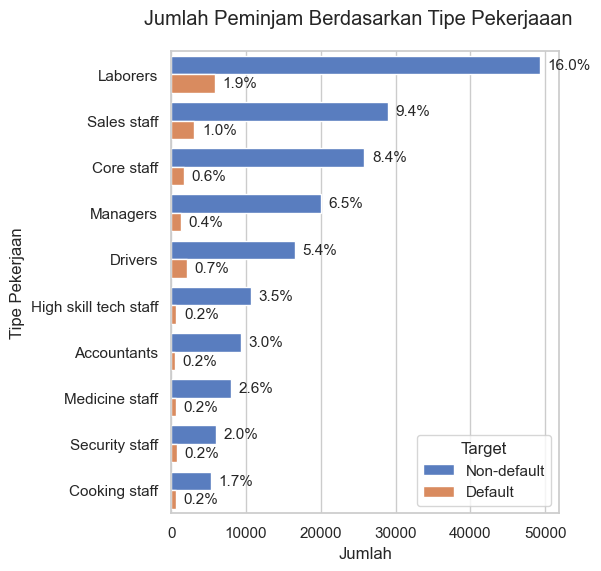

In [ ]:
# inisialisasi judul chart
chart = 'Jumlah Peminjam Berdasarkan Tipe Pekerjaaan'

# apply prosedur untuk plotting chart
countplot_univariate(df, 'occupation_type', 'target', 'Tipe Pekerjaan', 10, 0, None, 5, 6, 0.95, \
                     'horizontal', chart)

Chart di atas menunjukkan distribusi variabel target berdasarkan tipe pekerjaan. Peminjam yang bekerja sebagai buruh paling banyak gagal bayar (*default*) dengan persentase 1,9%. Diikuti oleh staf penjualan 1% dan sopir 0,7%.

**Keterangan:**

*   Default	= Gagal bayar
*   Non-default	= Tidak gagal bayar

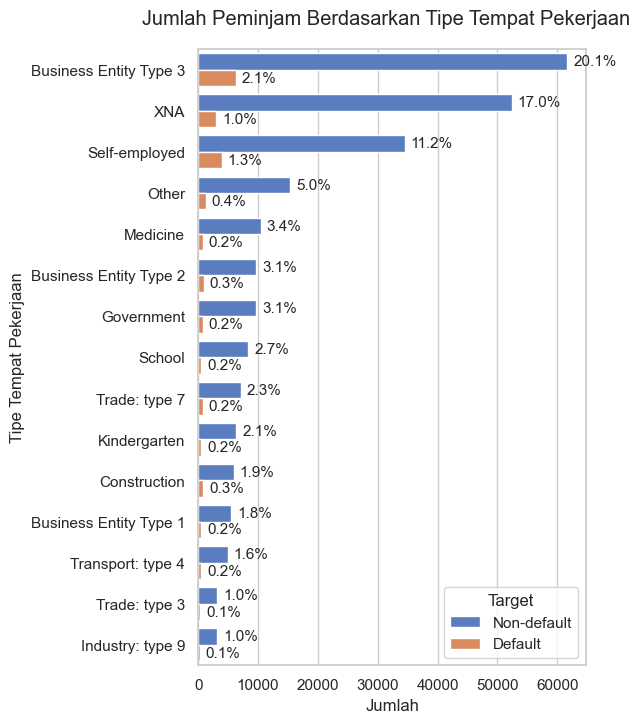

In [ ]:
# inisialisasi judul chart
chart = 'Jumlah Peminjam Berdasarkan Tipe Tempat Pekerjaan'

# apply prosedur untuk plotting chart
countplot_univariate(df, 'organization_type', 'target', 'Tipe Tempat Pekerjaan', 15, 0, None, 5, 8, 0.93, \
                     'horizontal', chart)

Chart di atas menunjukkan distribusi variabel target berdasarkan tipe tempat pekerjaan. Peminjam yang bekerja pada entitas bisnis 3 paling banyak gagal bayar (*default*) dengan persentase 2,1%. Diikuti oleh wiraswasta 1,3%.

**Keterangan:**

*   Default	= Gagal bayar
*   Non-default	= Tidak gagal bayar

### Bivariate Analysis

In [ ]:
# deskripsi parameter
"""
    Deskripsi Parameter:

    - data: data yang digunakan
    - x: fitur x
    - y: fitur y
    - hue: variabel ketiga (pembeda kategori)
    - label: label variabel pengamatan
    - width: lebar chart
    - height: tinggi chart
    - y_title: jarak antara title dengan judul
    - orient: orientasi plot (vertikal atau horizontal)
    - title: judul chart
"""

# fungsi untuk plotting boxplot bivariate
def boxplot_bivariate(data, x, y, hue, label, width, height, y_title, orient, title):

    # set lebar, tinggi dan judul chart
    plt.figure(figsize=(width, height))
    plt.suptitle(f'{title}', y=y_title)

    # copy data untuk proses distribusi
    df_dist = data.copy()
    df_dist[hue] = df_dist[hue].apply(lambda x: 'Non-default' if x == 0 else 'Default')
    df_dist[x] = df_dist[x].apply(lambda x: 'Female' if x == 'F' else ('Male' if x == 'M' else 'Unknown'))
    df_dist.sort_values(by=hue, ascending=False, inplace=True)

    # percabangan parameter orient untuk plotting chart secara vertikal atau horizontal
    if orient == 'vertical':
        g = sns.boxplot(x=x, y=y, hue=hue, showmeans=True, palette='muted', data=df_dist)
    elif orient == 'horizontal':
        g = sns.boxplot(x=y, y=x, hue=hue, showmeans=True, palette='muted', data=df_dist)
    g.set(xlabel='Gender', ylabel=label)

    plt.show()

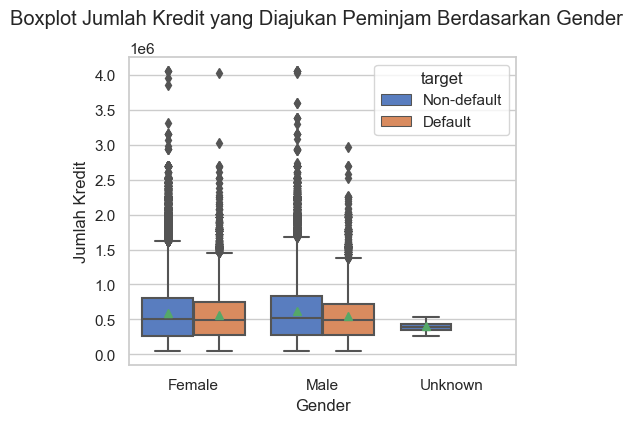

In [ ]:
# inisialisasi judul chart
chart = 'Boxplot Jumlah Kredit yang Diajukan Peminjam Berdasarkan Gender'

# apply prosedur untuk plotting chart
boxplot_bivariate(df, 'code_gender', 'amt_credit', 'target', 'Jumlah Kredit', 5, 4, 1, 'vertical', chart)

Chart di atas menunjukkan distribusi jumlah kredit berdasarkan gender dan target. Terdapat *outlier* untuk setiap gender, data tersebar sekitar 0,3 sampai dengan 0,7.

**Keterangan:**

*   Default	= Gagal bayar
*   Non-default	= Tidak gagal bayar



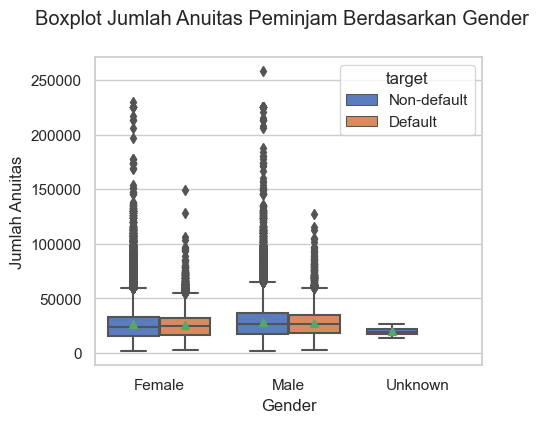

In [ ]:
# inisialisasi judul chart
chart = 'Boxplot Jumlah Anuitas Peminjam Berdasarkan Gender'

# apply prosedur untuk plotting chart
boxplot_bivariate(df, 'code_gender', 'amt_annuity', 'target', 'Jumlah Anuitas', 5, 4, 1, 'vertical', chart)

Chart di atas menunjukkan distribusi jumlah anuitas berdasarkan gender dan target. Terdapat *outlier* untuk setiap gender, data tersebar dibawah 50 ribu.

**Keterangan:**

*   Default	= Gagal bayar
*   Non-default	= Tidak gagal bayar



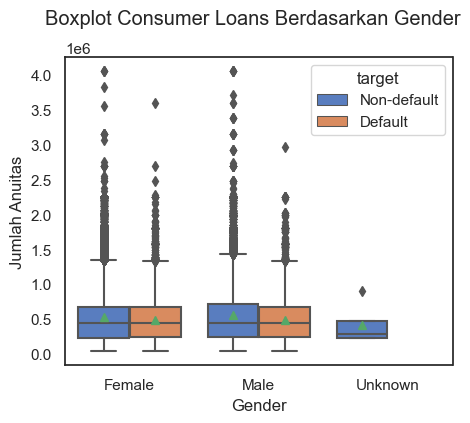

In [ ]:
# inisialisasi judul chart
chart = 'Boxplot Consumer Loans Berdasarkan Gender'

# apply prosedur untuk plotting chart
boxplot_bivariate(df, 'code_gender', 'amt_goods_price', 'target', 'Jumlah Anuitas', 5, 4, 1, 'vertical', chart)

Chart di atas menunjukkan distribusi consumer loans berdasarkan gender dan target. Terdapat *outlier* untuk setiap gender, data tersebar sekitar 0,3 sampai dengan 0,7.

**Keterangan:**

*   Default	= Gagal bayar
*   Non-default	= Tidak gagal bayar



### Distribution and Correlation

In [ ]:
sns.set_theme(style="white")

# deskripsi parameter
"""
    - data: data yang digunakan
    - x: fitur x
    - hue: variabel ketiga (pembeda kategori)
    - label: label variabel pengamatan
    - width: lebar chart
    - height: tinggi chart
    - y_title: jarak antara title dengan judul
    - title: judul chart
"""

# fungsi untuk plotting kdeplot distribusi
def kdeplot_dist(data, x, hue, label, width, height, y_title, title):

    # set lebar, tinggi dan judul chart
    plt.figure(figsize=(width, height))
    plt.suptitle(f'{title}', y=y_title)

    # plotting kdeplot
    g = sns.kdeplot(data=data, x=x, hue=hue, palette='muted')
    plt.legend(title='Target', labels=['Default', 'Non-default'], fontsize=11)
    g.set(xlabel=label, ylabel='Density')

    plt.show()

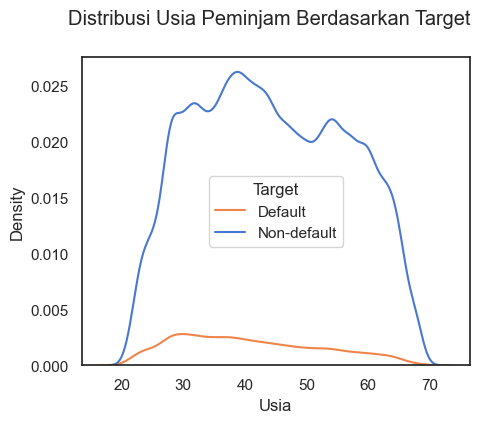

In [ ]:
# inisialisasi judul chart
chart = 'Distribusi Usia Peminjam Berdasarkan Target'

# apply prosedur untuk plotting chart
kdeplot_dist(df, 'age_client', 'target', 'Usia', 5, 4, 1, chart)

Chart di atas menunjukkan distribusi peminjam berdasarkan target. Usia peminjam tersebar pada area 30 tahun sampai dengan 60 tahun.

**Keterangan:**

*   Default	= Gagal bayar
*   Non-default	= Tidak gagal bayar



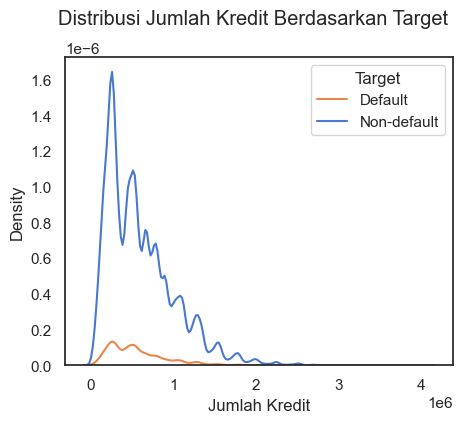

In [ ]:
# inisialisasi judul chart
chart = 'Distribusi Jumlah Kredit Berdasarkan Target'

# apply prosedur untuk plotting chart
kdeplot_dist(df, 'amt_credit', 'target', 'Jumlah Kredit', 5, 4, 1, chart)

Chart di atas menunjukkan distribusi jumlah kredit berdasarkan target. Jumlah kredit tersebar pada area 0 sampai dengan 2.

**Keterangan:**

*   Default	= Gagal bayar
*   Non-default	= Tidak gagal bayar



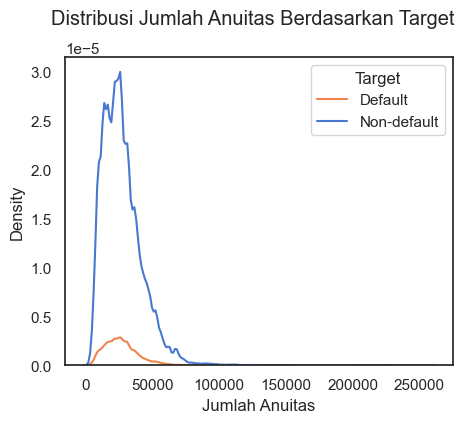

In [ ]:
# inisialisasi judul chart
chart = 'Distribusi Jumlah Anuitas Berdasarkan Target'

# apply prosedur untuk plotting chart
kdeplot_dist(df, 'amt_annuity', 'target', 'Jumlah Anuitas', 5, 4, 1, chart)

Chart di atas menunjukkan distribusi jumlah anuitas berdasarkan target. Jumlah anuitas tersebar pada area 0 sampai dengan 100000.

**Keterangan:**

*   Default	= Gagal bayar
*   Non-default	= Tidak gagal bayar

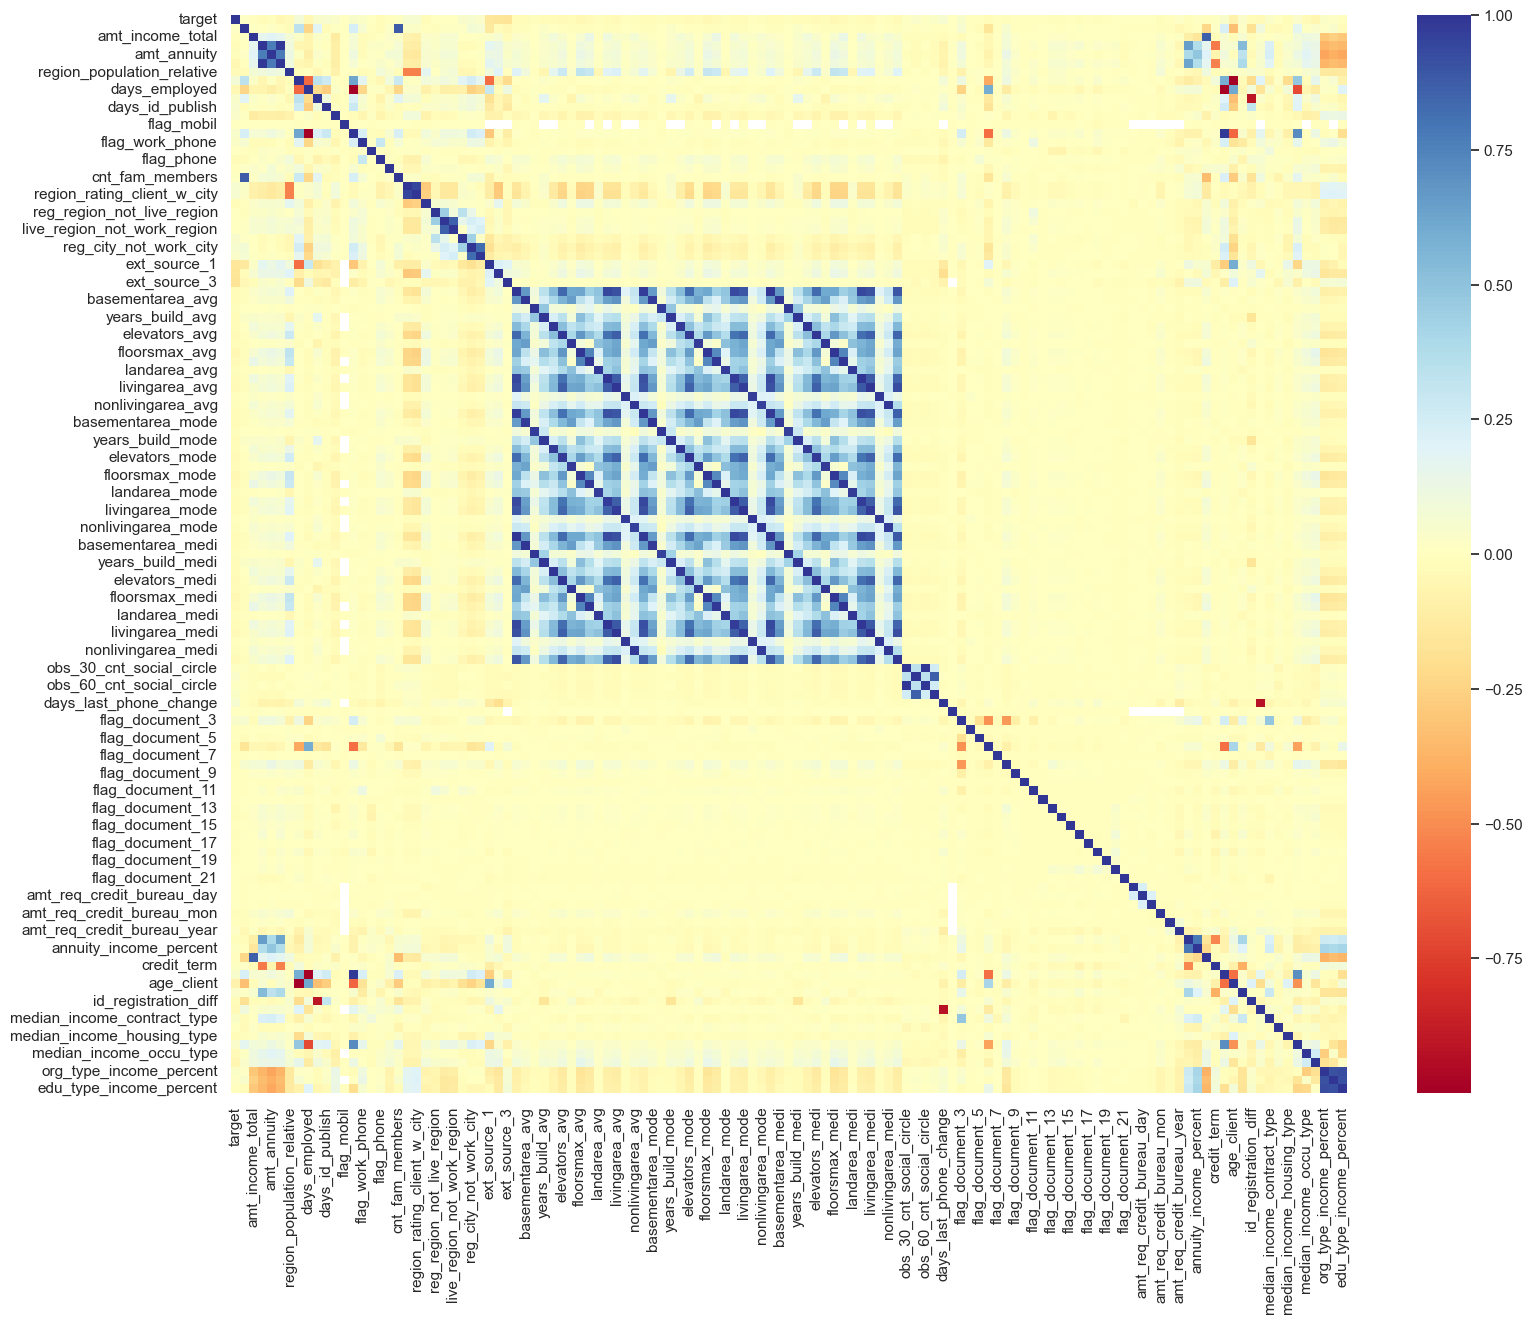

In [ ]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(18, 14))

# plotting heatmap korelasi antarfitur
sns.heatmap(df.corr(), annot=False, cmap="RdYlBu")
plt.show()

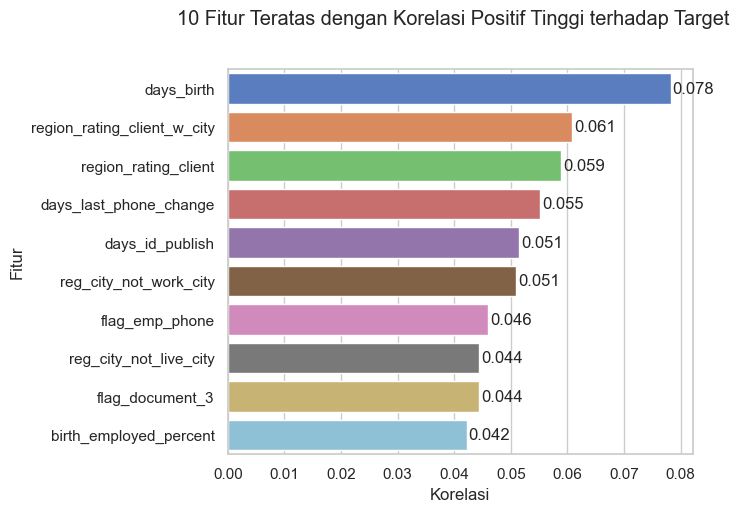

In [ ]:
# inisialisasi judul chart
chart = '10 Fitur Teratas dengan Korelasi Positif Tinggi terhadap Target'

# hitung kolerasi setiap fitur data dan ambil 10 fitur teratas
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['target'].drop('target').sort_values(ascending=False)
top_features = correlation_with_target.head(10)

# set lebar, tinggi dan judul chart
plt.figure(figsize=(6, 5))
plt.suptitle(f'{chart}', y=1)

# plotting barplot untuk 10 fitur teratas dengan korelasi positif tinggi
g = sns.barplot(y=top_features.index, x=top_features.values, palette='muted')
g.set(xlabel='Korelasi', ylabel='Fitur')

# looping untuk menampilkan nilai korelasi
for container in g.containers:
    g.bar_label(container, fmt='%.3f', padding=1.5, size=12)

plt.show()

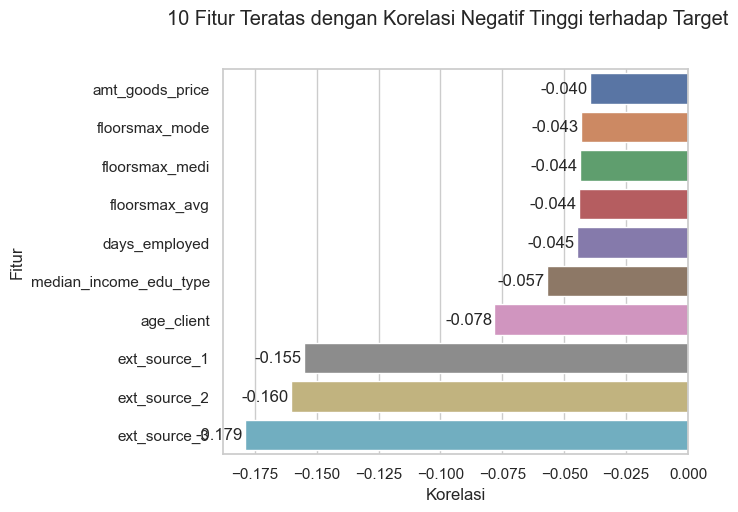

In [ ]:
# inisialisasi judul chart
chart = '10 Fitur Teratas dengan Korelasi Negatif Tinggi terhadap Target'

# hitung kolerasi setiap fitur data
plt.figure(figsize=(6, 5))
plt.suptitle(f'{chart}', y=1)

# ambil 10 fitur
top_features = correlation_with_target.tail(10)

# plotting barplot untuk 10 fitur teratas dengan korelasi negatif tinggi
g = sns.barplot(y=top_features.index, x=top_features.values)
g.set(xlabel='Korelasi', ylabel='Fitur')

# looping untuk menampilkan nilai korelasi
for container in g.containers:
    g.bar_label(container, fmt='%.3f', padding=1.5, size=12)

plt.show()

# Modeling

## Train Test Splitting

In [ ]:
sns.set_theme(style="white")

# inisialisasi X sebagai fitur dan y sebagai target
X = train.drop('TARGET', axis=1).values
y = train['TARGET'].values

In [ ]:
from sklearn.model_selection import train_test_split

# splitting data train dan test dengan jumlah test 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=21)

## Sampling

In [ ]:
# import library untuk sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
from collections import Counter

print("Class distribution before sampling:", Counter(y))

# inisialisasi pipeline untuk perform kombinasi oversampling dan undersampling dengan parameter 0.2 dan 0.95
pipeline = make_pipeline(
    SMOTE(sampling_strategy=0.2, random_state=21),
    RandomUnderSampler(sampling_strategy=0.95)
    )

# fitting pipeline sampling pada data train
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)
print("Class distribution after sampling:", Counter(y_train_resampled))

Class distribution before sampling: Counter({0: 282686, 1: 24825})
Class distribution after sampling: Counter({0: 41658, 1: 39576})


In [ ]:
# inisialisasi list untuk menyimpan metrik evaluasi model
models = ['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracy_model = []
recall_model = []
f1_model = []
ROC_AUC_model = []

## Naive Bayes

In [ ]:
# import library model, metrik evaluasi, classification report, dan confusion matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_auc_score, make_scorer

# inisialisasi model dan fitting dengan data setelah sampling
NB_classifier = GaussianNB()
NB_classifier.fit(X_train_resampled, y_train_resampled)

y_pred = NB_classifier.predict(X_test)

# hitung recall, accuracy dan confusion matrix
recall = recall_score(y_test, y_pred)
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print hasil
print(f"Recall: {recall}")
print(f"Accuracy: {accurary}\n")

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))

print("="*55)
print("Confusion Matrix:\n\n", cm)

print("="*55)
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))

Recall: 0.05531686358754028
Accuracy: 0.8890779803585752

Classification Report:

               precision    recall  f1-score   support

           0       0.92      0.96      0.94     84806
           1       0.11      0.06      0.07      7448

    accuracy                           0.89     92254
   macro avg       0.52      0.51      0.51     92254
weighted avg       0.86      0.89      0.87     92254

Confusion Matrix:

 [[81609  3197]
 [ 7036   412]]
ROC AUC Score:  0.5088095295934542


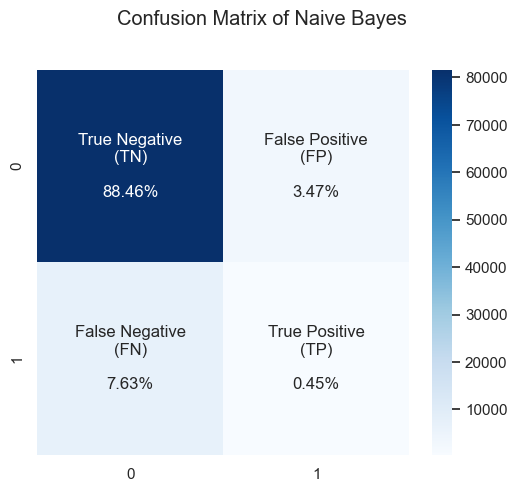

In [ ]:
# inisialisasi nama chart
chart = 'Naive Bayes'

# set lebar, tinggi dan judul chart
plt.figure(figsize=(6, 5))
plt.suptitle(f'Confusion Matrix of {chart}', y=1)

# inisialisasi TP, TN, FN, dan FP serta persentasenya
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_initial = ['(TN)','(FP)','(FN)','(TP)']
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

# inisialisasi label dengan TP, TN, FN, dan FP serta persentasenya
labels = [f"{v1}\n{v2}\n\n{v3}" for v1, v2, v3 in zip(group_names, group_initial, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# plotting heatmap confusion matrix
g = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

plt.show()

In [ ]:
# inisialisasi cross-validation dan kfold
from sklearn.model_selection import cross_val_score, KFold

# inisialisasi kfold dengan jumlah fold = 6
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# inisialiasi list untuk menyimpan nilai cv accuracy, recall, dan f1
# inisialiasi list untuk menyimpan metrik evaluasi
cv_result_list = ['cv_results_accuracy', 'cv_results_recall', 'cv_results_f1']
metric_list = ['accuracy', 'recall', 'f1']

# looping untuk perform cross-validation dengan metrik evaluasi
for cv, metric in zip(cv_result_list, metric_list):
  globals()[cv] = cross_val_score(NB_classifier, X_train_resampled, y_train_resampled, cv=kf, scoring=metric)

# perform cross-validation untuk ROC AUC
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=False)
cv_results_roc_auc = cross_val_score(NB_classifier, X_train_resampled, y_train_resampled, cv=kf, scoring=roc_auc_scorer)

cv_result_list.append('cv_results_roc_auc')

recap_list = ['acc_recap', 'recall_recap', 'f1_recap', 'roc_auc_recap']

# looping untuk ambil hasil cv
for recap, cv in zip(recap_list, cv_result_list):
  globals()[recap] = globals()[cv]

# hitung rata-rata (mean) dari metrik evaluasi setelah cross-validation
accuracy_model.append(np.mean(acc_recap))
recall_model.append(np.mean(recall_recap))
f1_model.append(np.mean(f1_recap))
ROC_AUC_model.append(np.mean(roc_auc_recap))

print(f"{chart} Cross-validation Result:\n")

# inisialisasi tabel
table = PrettyTable()
table.field_names = ["Fold", "Accuracy", "Recall", "F1-Score", "ROC AUC"]

# masukkan nilai
merged_metric = [list(x) for x in zip(np.arange(1, 7), np.round(acc_recap, 3), np.round(recall_recap, 3),
                                      np.round(f1_recap, 3), np.round(roc_auc_recap, 3))]

# looping untuk menambahkan row dan print tabel
for row in merged_metric:
    table.add_row(row)

print(table)

Naive Bayes Cross-validation Result:

+------+----------+--------+----------+---------+
| Fold | Accuracy | Recall | F1-Score | ROC AUC |
+------+----------+--------+----------+---------+
|  1   |   0.52   | 0.046  |  0.084   |  0.506  |
|  2   |   0.52   | 0.055  |   0.1    |  0.508  |
|  3   |  0.518   | 0.046  |  0.086   |  0.509  |
|  4   |  0.532   | 0.082  |  0.146   |   0.52  |
|  5   |  0.512   | 0.051  |  0.094   |  0.507  |
|  6   |  0.545   | 0.127  |  0.212   |  0.529  |
+------+----------+--------+----------+---------+


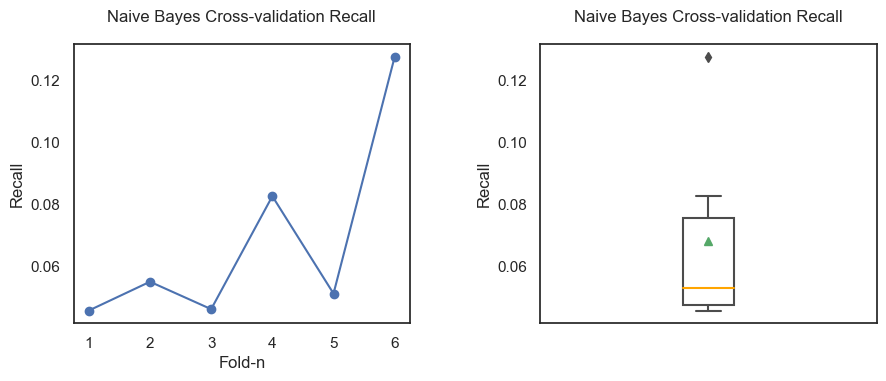

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

metric_label = 'Recall'

# plotting line chart hasil recall cross-validation
axes[0].plot(range(1, 7), recall_recap, marker='o')
axes[0].set_title(f'{chart} Cross-validation {metric_label}', y=1.05)
axes[0].set_xlabel('Fold-n')
axes[0].set_ylabel(f'{metric_label}')

# plotting boxplot hasil recall cross-validation
sns.boxplot(data=recall_recap, showmeans=True, width=0.15, boxprops={'facecolor': 'None'},
            medianprops={'color': 'orange'}, ax=axes[1])
axes[1].set_title(f'{chart} Cross-validation {metric_label}', y=1.05)
axes[1].set_ylabel(f'{metric_label}')
axes[1].set_xticks([])

plt.tight_layout(pad=4)
plt.show()

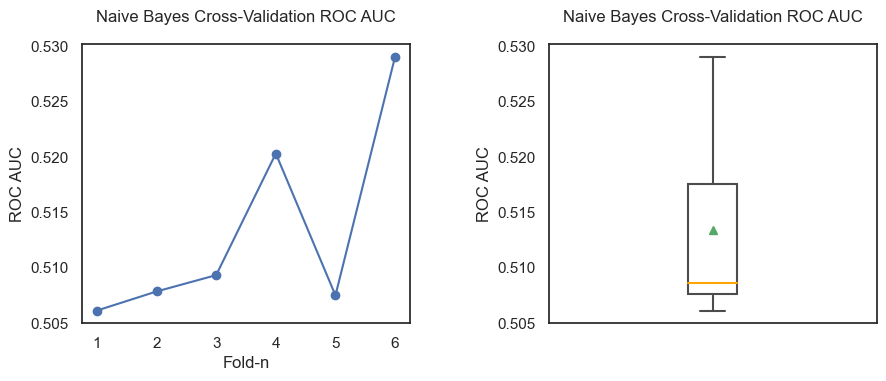

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

metric_label = 'ROC AUC'

# plotting line chart hasil ROC AUC cross-validation
axes[0].plot(range(1, 7), roc_auc_recap, marker='o')
axes[0].set_title(f'{chart} Cross-Validation {metric_label}', y=1.05)
axes[0].set_xlabel('Fold-n')
axes[0].set_ylabel(f'{metric_label}')

# plotting boxplot hasil ROC AUC cross-validation
sns.boxplot(data=roc_auc_recap, showmeans=True, width=0.15, boxprops={'facecolor': 'None'},
            medianprops={'color': 'orange'}, ax=axes[1])
axes[1].set_title(f'{chart} Cross-Validation {metric_label}', y=1.05)
axes[1].set_ylabel(f'{metric_label}')
axes[1].set_xticks([])

plt.tight_layout(pad=4)
plt.show()

## Logistic Regression

In [ ]:
# import library model
from sklearn.linear_model import LogisticRegression

# inisialisasi model dan fitting dengan data setelah sampling
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train_resampled, y_train_resampled)

y_pred = LR_classifier.predict(X_test)

# hitung recall, accuracy dan confusion matrix
recall = recall_score(y_test, y_pred)
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print hasil
print(f"Recall: {recall}")
print(f"Accuracy: {accurary}\n")

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))

print("="*55)
print("Confusion Matrix:\n\n", cm)

print("="*55)
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))

Recall: 0.5921052631578947
Accuracy: 0.6053070869555791

Classification Report:

               precision    recall  f1-score   support

           0       0.94      0.61      0.74     84806
           1       0.12      0.59      0.19      7448

    accuracy                           0.61     92254
   macro avg       0.53      0.60      0.47     92254
weighted avg       0.88      0.61      0.69     92254

Confusion Matrix:

 [[51432 33374]
 [ 3038  4410]]
ROC AUC Score:  0.5992858933764617


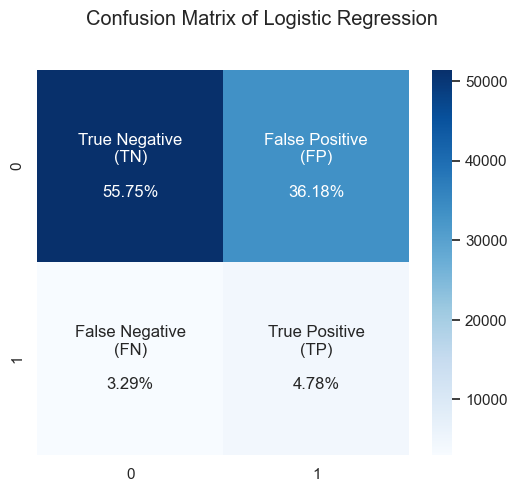

In [ ]:
# inisialisasi nama chart
chart = 'Logistic Regression'

# set lebar, tinggi dan judul chart
plt.figure(figsize=(6, 5))
plt.suptitle(f'Confusion Matrix of {chart}', y=1)

# inisialisasi TP, TN, FN, dan FP serta persentasenya
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_initial = ['(TN)','(FP)','(FN)','(TP)']
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

# inisialisasi label dengan TP, TN, FN, dan FP serta persentasenya
labels = [f"{v1}\n{v2}\n\n{v3}" for v1, v2, v3 in zip(group_names, group_initial, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# plotting heatmap confusion matrix
g = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

plt.show()

In [ ]:
# inisialisasi cross-validation dan kfold
from sklearn.model_selection import cross_val_score, KFold

# inisialisasi kfold dengan jumlah fold = 6
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# inisialiasi list untuk menyimpan nilai cv accuracy, recall, dan f1
# inisialiasi list untuk menyimpan metrik evaluasi
cv_result_list = ['cv_results_accuracy', 'cv_results_recall', 'cv_results_f1']
metric_list = ['accuracy', 'recall', 'f1']

# looping untuk perform cross-validation dengan metrik evaluasi
for cv, metric in zip(cv_result_list, metric_list):
  globals()[cv] = cross_val_score(LR_classifier, X_train_resampled, y_train_resampled, cv=kf, scoring=metric)

# perform cross-validation untuk ROC AUC
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=False)
cv_results_roc_auc = cross_val_score(LR_classifier, X_train_resampled, y_train_resampled, cv=kf, scoring=roc_auc_scorer)

cv_result_list.append('cv_results_roc_auc')

recap_list = ['acc_recap', 'recall_recap', 'f1_recap', 'roc_auc_recap']

# looping untuk ambil hasil cv
for recap, cv in zip(recap_list, cv_result_list):
  globals()[recap] = globals()[cv]

# hitung rata-rata (mean) dari metrik evaluasi setelah cross-validation
accuracy_model.append(np.mean(acc_recap))
recall_model.append(np.mean(recall_recap))
f1_model.append(np.mean(f1_recap))
ROC_AUC_model.append(np.mean(roc_auc_recap))

print(f"{chart} Cross-validation Result:\n")

# inisialisasi tabel
table = PrettyTable()
table.field_names = ["Fold", "Accuracy", "Recall", "F1-Score", "ROC AUC"]

# masukkan nilai
merged_metric = [list(x) for x in zip(np.arange(1, 7), np.round(acc_recap, 3), np.round(recall_recap, 3),
                                      np.round(f1_recap, 3), np.round(roc_auc_recap, 3))]

# looping untuk menambahkan row dan print tabel
for row in merged_metric:
    table.add_row(row)

print(table)

Logistic Regression Cross-validation Result:

+------+----------+--------+----------+---------+
| Fold | Accuracy | Recall | F1-Score | ROC AUC |
+------+----------+--------+----------+---------+
|  1   |  0.608   |  0.61  |  0.601   |  0.608  |
|  2   |   0.61   | 0.595  |  0.598   |   0.61  |
|  3   |  0.606   | 0.596  |  0.598   |  0.606  |
|  4   |  0.606   |  0.61  |  0.601   |  0.606  |
|  5   |  0.602   | 0.586  |  0.593   |  0.602  |
|  6   |  0.609   | 0.597  |  0.595   |  0.608  |
+------+----------+--------+----------+---------+


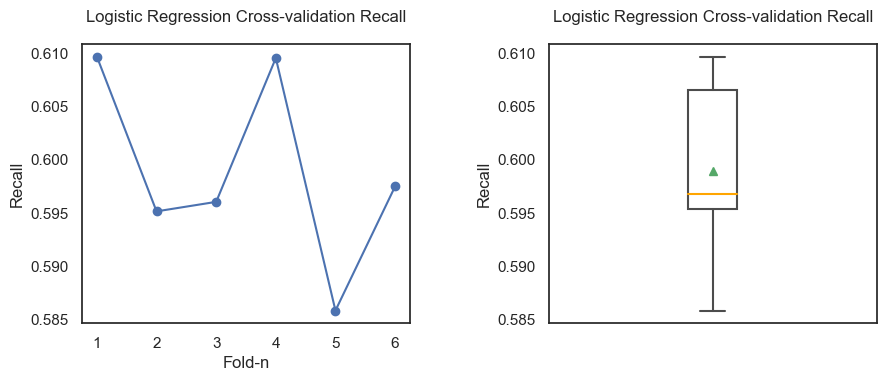

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

metric_label = 'Recall'

# plotting line chart hasil recall cross-validation
axes[0].plot(range(1, 7), recall_recap, marker='o')
axes[0].set_title(f'{chart} Cross-validation {metric_label}', y=1.05)
axes[0].set_xlabel('Fold-n')
axes[0].set_ylabel(f'{metric_label}')

# plotting boxplot hasil recall cross-validation
sns.boxplot(data=recall_recap, showmeans=True, width=0.15, boxprops={'facecolor': 'None'},
            medianprops={'color': 'orange'}, ax=axes[1])
axes[1].set_title(f'{chart} Cross-validation {metric_label}', y=1.05)
axes[1].set_ylabel(f'{metric_label}')
axes[1].set_xticks([])

plt.tight_layout(pad=4)
plt.show()

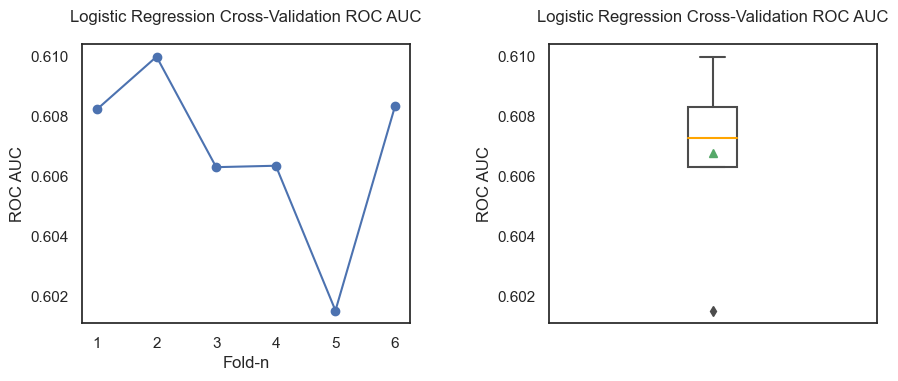

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

metric_label = 'ROC AUC'

# plotting line chart hasil ROC AUC cross-validation
axes[0].plot(range(1, 7), roc_auc_recap, marker='o')
axes[0].set_title(f'{chart} Cross-Validation {metric_label}', y=1.05)
axes[0].set_xlabel('Fold-n')
axes[0].set_ylabel(f'{metric_label}')

# plotting boxplot hasil ROC AUC cross-validation
sns.boxplot(data=roc_auc_recap, showmeans=True, width=0.15, boxprops={'facecolor': 'None'},
            medianprops={'color': 'orange'}, ax=axes[1])
axes[1].set_title(f'{chart} Cross-Validation {metric_label}', y=1.05)
axes[1].set_ylabel(f'{metric_label}')
axes[1].set_xticks([])

plt.tight_layout(pad=4)
plt.show()

## Decision Tree

In [ ]:
# import library model
from sklearn.tree import DecisionTreeClassifier

# inisialisasi model dan fitting dengan data setelah sampling
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train_resampled, y_train_resampled)

y_pred = DT_classifier.predict(X_test)

# hitung recall, accuracy dan confusion matrix
recall = recall_score(y_test, y_pred)
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print hasil
print(f"Recall: {recall}")
print(f"Accuracy: {accurary}\n")

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))

print("="*55)
print("Confusion Matrix:\n\n", cm)

print("="*55)
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))

Recall: 0.4359559613319012
Accuracy: 0.6932815921260866

Classification Report:

               precision    recall  f1-score   support

           0       0.94      0.72      0.81     84806
           1       0.12      0.44      0.19      7448

    accuracy                           0.69     92254
   macro avg       0.53      0.58      0.50     92254
weighted avg       0.87      0.69      0.76     92254

Confusion Matrix:

 [[60711 24095]
 [ 4201  3247]]
ROC AUC Score:  0.5759184565756739


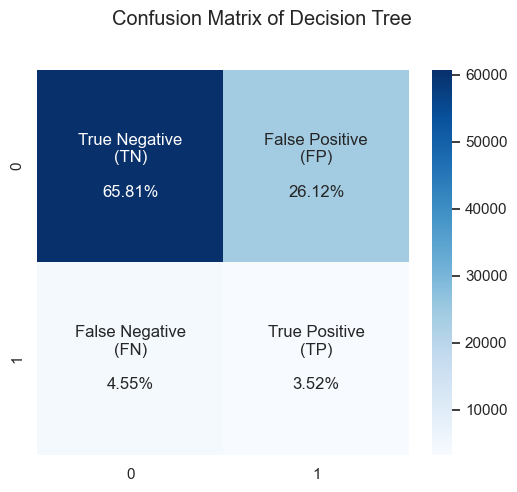

In [ ]:
# inisialisasi nama chart
chart = 'Decision Tree'

# set lebar, tinggi dan judul chart
plt.figure(figsize=(6, 5))
plt.suptitle(f'Confusion Matrix of {chart}', y=1)

# inisialisasi TP, TN, FN, dan FP serta persentasenya
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_initial = ['(TN)','(FP)','(FN)','(TP)']
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

# inisialisasi label dengan TP, TN, FN, dan FP serta persentasenya
labels = [f"{v1}\n{v2}\n\n{v3}" for v1, v2, v3 in zip(group_names, group_initial, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# plotting heatmap confusion matrix
g = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

plt.show()

In [ ]:
# inisialisasi cross-validation dan kfold
from sklearn.model_selection import cross_val_score, KFold

# inisialisasi kfold dengan jumlah fold = 6
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# inisialiasi list untuk menyimpan nilai cv accuracy, recall, dan f1
# inisialiasi list untuk menyimpan metrik evaluasi
cv_result_list = ['cv_results_accuracy', 'cv_results_recall', 'cv_results_f1']
metric_list = ['accuracy', 'recall', 'f1']

# looping untuk perform cross-validation dengan metrik evaluasi
for cv, metric in zip(cv_result_list, metric_list):
  globals()[cv] = cross_val_score(DT_classifier, X_train_resampled, y_train_resampled, cv=kf, scoring=metric)

# perform cross-validation untuk ROC AUC
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=False)
cv_results_roc_auc = cross_val_score(DT_classifier, X_train_resampled, y_train_resampled, cv=kf, scoring=roc_auc_scorer)

cv_result_list.append('cv_results_roc_auc')

recap_list = ['acc_recap', 'recall_recap', 'f1_recap', 'roc_auc_recap']

# looping untuk ambil hasil cv
for recap, cv in zip(recap_list, cv_result_list):
  globals()[recap] = globals()[cv]

# hitung rata-rata (mean) dari metrik evaluasi setelah cross-validation
accuracy_model.append(np.mean(acc_recap))
recall_model.append(np.mean(recall_recap))
f1_model.append(np.mean(f1_recap))
ROC_AUC_model.append(np.mean(roc_auc_recap))

print(f"{chart} Cross-validation Result:\n")

# inisialisasi tabel
table = PrettyTable()
table.field_names = ["Fold", "Accuracy", "Recall", "F1-Score", "ROC AUC"]

# masukkan nilai
merged_metric = [list(x) for x in zip(np.arange(1, 7), np.round(acc_recap, 3), np.round(recall_recap, 3),
                                      np.round(f1_recap, 3), np.round(roc_auc_recap, 3))]

# looping untuk menambahkan row dan print tabel
for row in merged_metric:
    table.add_row(row)

print(table)

Decision Tree Cross-validation Result:

+------+----------+--------+----------+---------+
| Fold | Accuracy | Recall | F1-Score | ROC AUC |
+------+----------+--------+----------+---------+
|  1   |   0.72   | 0.726  |  0.716   |  0.719  |
|  2   |   0.72   | 0.724  |  0.716   |   0.72  |
|  3   |   0.72   | 0.719  |  0.713   |  0.721  |
|  4   |  0.716   | 0.713  |  0.708   |  0.715  |
|  5   |  0.715   | 0.724  |  0.716   |  0.716  |
|  6   |  0.713   | 0.723  |  0.713   |  0.719  |
+------+----------+--------+----------+---------+


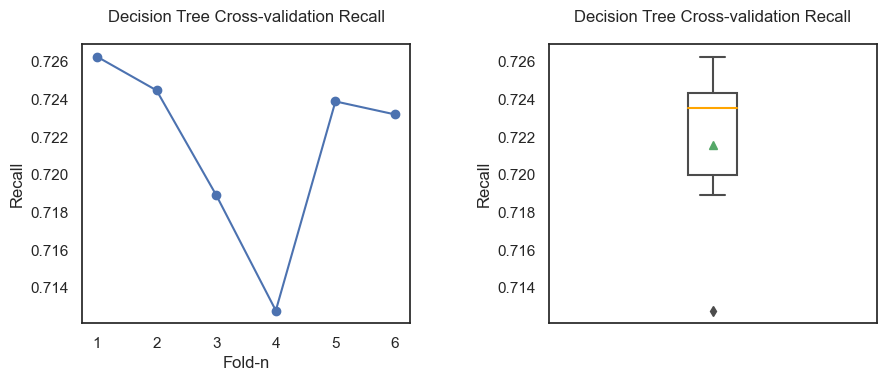

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

metric_label = 'Recall'

# plotting line chart hasil recall cross-validation
axes[0].plot(range(1, 7), recall_recap, marker='o')
axes[0].set_title(f'{chart} Cross-validation {metric_label}', y=1.05)
axes[0].set_xlabel('Fold-n')
axes[0].set_ylabel(f'{metric_label}')

# plotting boxplot hasil recall cross-validation
sns.boxplot(data=recall_recap, showmeans=True, width=0.15, boxprops={'facecolor': 'None'},
            medianprops={'color': 'orange'}, ax=axes[1])
axes[1].set_title(f'{chart} Cross-validation {metric_label}', y=1.05)
axes[1].set_ylabel(f'{metric_label}')
axes[1].set_xticks([])

plt.tight_layout(pad=4)
plt.show()

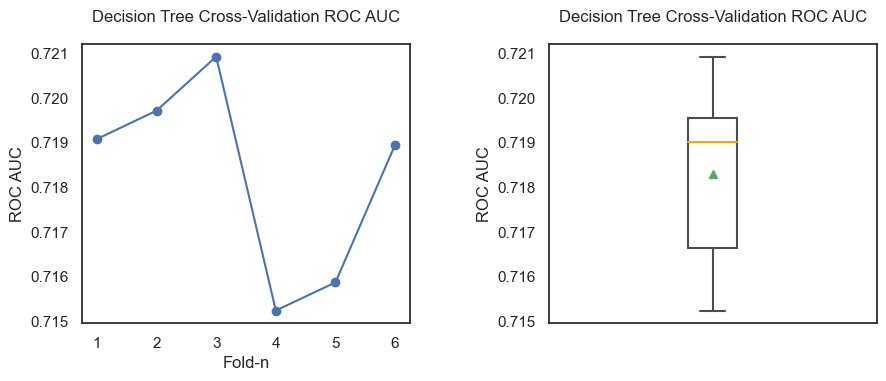

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

metric_label = 'ROC AUC'

# plotting line chart hasil ROC AUC cross-validation
axes[0].plot(range(1, 7), roc_auc_recap, marker='o')
axes[0].set_title(f'{chart} Cross-Validation {metric_label}', y=1.05)
axes[0].set_xlabel('Fold-n')
axes[0].set_ylabel(f'{metric_label}')

# plotting boxplot hasil ROC AUC cross-validation
sns.boxplot(data=roc_auc_recap, showmeans=True, width=0.15, boxprops={'facecolor': 'None'},
            medianprops={'color': 'orange'}, ax=axes[1])
axes[1].set_title(f'{chart} Cross-Validation {metric_label}', y=1.05)
axes[1].set_ylabel(f'{metric_label}')
axes[1].set_xticks([])

plt.tight_layout(pad=4)
plt.show()

## Random Forest

In [ ]:
# import library model
from sklearn.ensemble import RandomForestClassifier

# inisialisasi model dan fitting dengan data setelah sampling
RF_classifier = RandomForestClassifier(n_estimators=100)
RF_classifier.fit(X_train_resampled, y_train_resampled)

y_pred = RF_classifier.predict(X_test)

# hitung recall, accuracy dan confusion matrix
recall = recall_score(y_test, y_pred)
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print hasil
print(f"Recall: {recall}")
print(f"Accuracy: {accurary}\n")

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))

print("="*55)
print("Confusion Matrix:\n\n", cm)

print("="*55)
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))

Recall: 0.2798066595059076
Accuracy: 0.8726776074750147

Classification Report:

               precision    recall  f1-score   support

           0       0.94      0.92      0.93     84806
           1       0.25      0.28      0.26      7448

    accuracy                           0.87     92254
   macro avg       0.59      0.60      0.60     92254
weighted avg       0.88      0.87      0.88     92254

Confusion Matrix:

 [[78424  6382]
 [ 5364  2084]]
ROC AUC Score:  0.6022762750634271


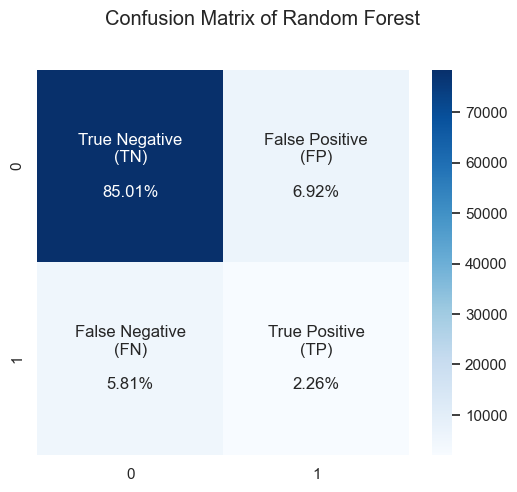

In [ ]:
# inisialisasi nama chart
chart = 'Random Forest'

# set lebar, tinggi dan judul chart
plt.figure(figsize=(6, 5))
plt.suptitle(f'Confusion Matrix of {chart}', y=1)

# inisialisasi TP, TN, FN, dan FP serta persentasenya
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_initial = ['(TN)','(FP)','(FN)','(TP)']
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

# inisialisasi label dengan TP, TN, FN, dan FP serta persentasenya
labels = [f"{v1}\n{v2}\n\n{v3}" for v1, v2, v3 in zip(group_names, group_initial, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# plotting heatmap confusion matrix
g = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

plt.show()

In [ ]:
# inisialisasi cross-validation dan kfold
from sklearn.model_selection import cross_val_score, KFold

# inisialisasi kfold dengan jumlah fold = 6
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# inisialiasi list untuk menyimpan nilai cv accuracy, recall, dan f1
# inisialiasi list untuk menyimpan metrik evaluasi
cv_result_list = ['cv_results_accuracy', 'cv_results_recall', 'cv_results_f1']
metric_list = ['accuracy', 'recall', 'f1']

# looping untuk perform cross-validation dengan metrik evaluasi
for cv, metric in zip(cv_result_list, metric_list):
  globals()[cv] = cross_val_score(RF_classifier, X_train_resampled, y_train_resampled, cv=kf, scoring=metric)

# perform cross-validation untuk ROC AUC
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=False)
cv_results_roc_auc = cross_val_score(RF_classifier, X_train_resampled, y_train_resampled, cv=kf, scoring=roc_auc_scorer)

cv_result_list.append('cv_results_roc_auc')

recap_list = ['acc_recap', 'recall_recap', 'f1_recap', 'roc_auc_recap']

# looping untuk ambil hasil cv
for recap, cv in zip(recap_list, cv_result_list):
  globals()[recap] = globals()[cv]

# hitung rata-rata (mean) dari metrik evaluasi setelah cross-validation
accuracy_model.append(np.mean(acc_recap))
recall_model.append(np.mean(recall_recap))
f1_model.append(np.mean(f1_recap))
ROC_AUC_model.append(np.mean(roc_auc_recap))

print(f"{chart} Cross-validation Result:\n")

# inisialisasi tabel
table = PrettyTable()
table.field_names = ["Fold", "Accuracy", "Recall", "F1-Score", "ROC AUC"]

# masukkan nilai
merged_metric = [list(x) for x in zip(np.arange(1, 7), np.round(acc_recap, 3), np.round(recall_recap, 3),
                                      np.round(f1_recap, 3), np.round(roc_auc_recap, 3))]

# looping untuk menambahkan row dan print tabel
for row in merged_metric:
    table.add_row(row)

print(table)

Random Forest Cross-validation Result:

+------+----------+--------+----------+---------+
| Fold | Accuracy | Recall | F1-Score | ROC AUC |
+------+----------+--------+----------+---------+
|  1   |  0.817   | 0.705  |  0.789   |  0.814  |
|  2   |  0.816   | 0.703  |  0.788   |  0.816  |
|  3   |  0.818   | 0.702  |  0.792   |  0.814  |
|  4   |  0.812   | 0.695  |  0.782   |   0.81  |
|  5   |  0.813   | 0.703  |  0.789   |  0.811  |
|  6   |  0.814   | 0.705  |  0.782   |  0.809  |
+------+----------+--------+----------+---------+


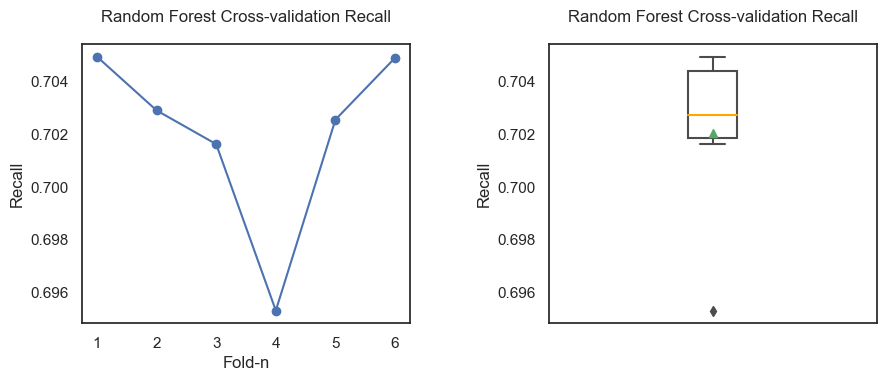

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

metric_label = 'Recall'

# plotting line chart hasil recall cross-validation
axes[0].plot(range(1, 7), recall_recap, marker='o')
axes[0].set_title(f'{chart} Cross-validation {metric_label}', y=1.05)
axes[0].set_xlabel('Fold-n')
axes[0].set_ylabel(f'{metric_label}')

# plotting boxplot hasil recall cross-validation
sns.boxplot(data=recall_recap, showmeans=True, width=0.15, boxprops={'facecolor': 'None'},
            medianprops={'color': 'orange'}, ax=axes[1])
axes[1].set_title(f'{chart} Cross-validation {metric_label}', y=1.05)
axes[1].set_ylabel(f'{metric_label}')
axes[1].set_xticks([])

plt.tight_layout(pad=4)
plt.show()

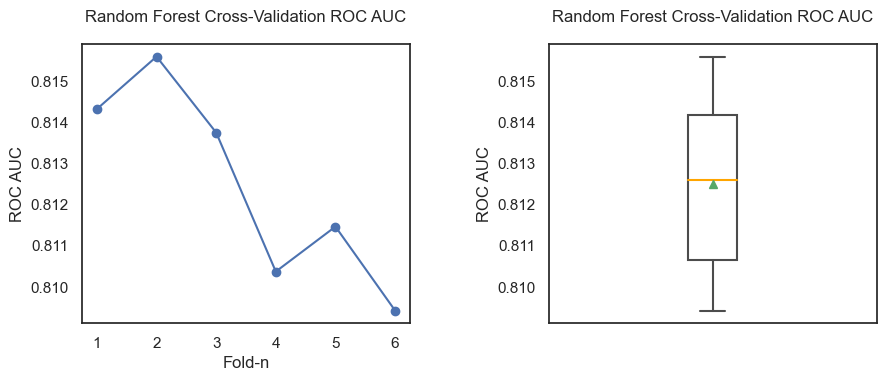

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

metric_label = 'ROC AUC'

# plotting line chart hasil ROC AUC cross-validation
axes[0].plot(range(1, 7), roc_auc_recap, marker='o')
axes[0].set_title(f'{chart} Cross-Validation {metric_label}', y=1.05)
axes[0].set_xlabel('Fold-n')
axes[0].set_ylabel(f'{metric_label}')

# plotting boxplot hasil ROC AUC cross-validation
sns.boxplot(data=roc_auc_recap, showmeans=True, width=0.15, boxprops={'facecolor': 'None'},
            medianprops={'color': 'orange'}, ax=axes[1])
axes[1].set_title(f'{chart} Cross-Validation {metric_label}', y=1.05)
axes[1].set_ylabel(f'{metric_label}')
axes[1].set_xticks([])

plt.tight_layout(pad=4)
plt.show()

## XGBoost

In [ ]:
# import library model
import xgboost as xgb

# inisialisasi parameter
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# inisialisasi model dan fitting dengan data setelah sampling
xgb_classifier = xgb.XGBClassifier(**params)
xgb_classifier.fit(X_train_resampled, y_train_resampled)

y_pred = xgb_classifier.predict(X_test)

# hitung recall, accuracy dan confusion matrix
recall = recall_score(y_test, y_pred)
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print hasil
print(f"Recall: {recall}")
print(f"Accuracy: {accurary}\n")

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))

print("="*55)
print("Confusion Matrix:\n\n", cm)

print("="*55)
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))

Recall: 0.37392588614393124
Accuracy: 0.8562555553146747

Classification Report:

               precision    recall  f1-score   support

           0       0.94      0.90      0.92     84806
           1       0.24      0.37      0.30      7448

    accuracy                           0.86     92254
   macro avg       0.59      0.64      0.61     92254
weighted avg       0.89      0.86      0.87     92254

Confusion Matrix:

 [[76208  8598]
 [ 4663  2785]]
ROC AUC Score:  0.636270775064985


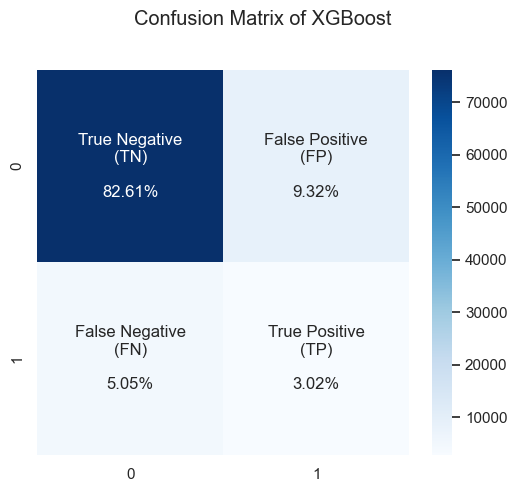

In [ ]:
# inisialisasi nama chart
chart = 'XGBoost'

# set lebar, tinggi dan judul chart
plt.figure(figsize=(6, 5))
plt.suptitle(f'Confusion Matrix of {chart}', y=1)

# inisialisasi TP, TN, FN, dan FP serta persentasenya
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_initial = ['(TN)','(FP)','(FN)','(TP)']
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

# inisialisasi label dengan TP, TN, FN, dan FP serta persentasenya
labels = [f"{v1}\n{v2}\n\n{v3}" for v1, v2, v3 in zip(group_names, group_initial, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# plotting heatmap confusion matrix
g = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

plt.show()

In [ ]:
# inisialisasi cross-validation dan kfold
from sklearn.model_selection import cross_val_score, KFold

# inisialisasi kfold dengan jumlah fold = 6
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# inisialiasi list untuk menyimpan nilai cv accuracy, recall, dan f1
# inisialiasi list untuk menyimpan metrik evaluasi
cv_result_list = ['cv_results_accuracy', 'cv_results_recall', 'cv_results_f1']
metric_list = ['accuracy', 'recall', 'f1']

# looping untuk perform cross-validation dengan metrik evaluasi
for cv, metric in zip(cv_result_list, metric_list):
  globals()[cv] = cross_val_score(xgb_classifier, X_train_resampled, y_train_resampled, cv=kf, scoring=metric)

# perform cross-validation untuk ROC AUC
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=False)
cv_results_roc_auc = cross_val_score(xgb_classifier, X_train_resampled, y_train_resampled, cv=kf, scoring=roc_auc_scorer)

cv_result_list.append('cv_results_roc_auc')

recap_list = ['acc_recap', 'recall_recap', 'f1_recap', 'roc_auc_recap']

# looping untuk ambil hasil cv
for recap, cv in zip(recap_list, cv_result_list):
  globals()[recap] = globals()[cv]

# hitung rata-rata (mean) dari metrik evaluasi setelah cross-validation
accuracy_model.append(np.mean(acc_recap))
recall_model.append(np.mean(recall_recap))
f1_model.append(np.mean(f1_recap))
ROC_AUC_model.append(np.mean(roc_auc_recap))

print(f"{chart} Cross-validation Result:\n")

# inisialisasi tabel
table = PrettyTable()
table.field_names = ["Fold", "Accuracy", "Recall", "F1-Score", "ROC AUC"]

# masukkan nilai
merged_metric = [list(x) for x in zip(np.arange(1, 7), np.round(acc_recap, 3), np.round(recall_recap, 3),
                                      np.round(f1_recap, 3), np.round(roc_auc_recap, 3))]

# looping untuk menambahkan row dan print tabel
for row in merged_metric:
    table.add_row(row)

print(table)

XGBoost Cross-validation Result:

+------+----------+--------+----------+---------+
| Fold | Accuracy | Recall | F1-Score | ROC AUC |
+------+----------+--------+----------+---------+
|  1   |  0.814   | 0.722  |   0.79   |  0.811  |
|  2   |  0.812   | 0.723  |  0.789   |  0.809  |
|  3   |  0.813   | 0.723  |  0.791   |  0.811  |
|  4   |  0.812   | 0.721  |  0.789   |   0.81  |
|  5   |  0.809   | 0.723  |   0.79   |  0.808  |
|  6   |  0.808   | 0.719  |  0.782   |  0.805  |
+------+----------+--------+----------+---------+


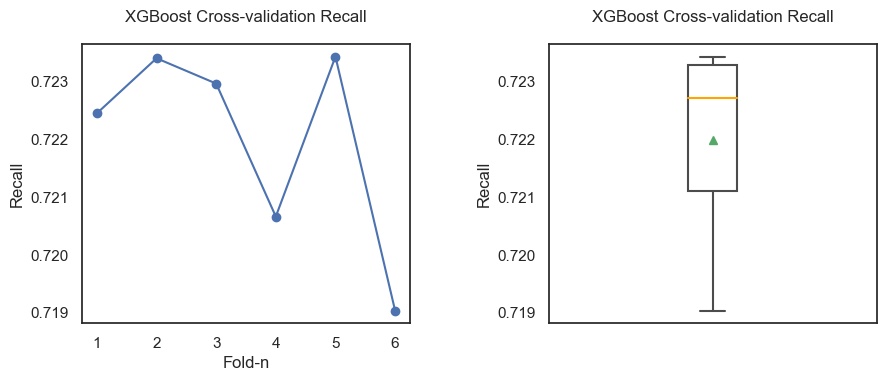

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

metric_label = 'Recall'

# plotting line chart hasil recall cross-validation
axes[0].plot(range(1, 7), recall_recap, marker='o')
axes[0].set_title(f'{chart} Cross-validation {metric_label}', y=1.05)
axes[0].set_xlabel('Fold-n')
axes[0].set_ylabel(f'{metric_label}')

# plotting boxplot hasil recall cross-validation
sns.boxplot(data=recall_recap, showmeans=True, width=0.15, boxprops={'facecolor': 'None'},
            medianprops={'color': 'orange'}, ax=axes[1])
axes[1].set_title(f'{chart} Cross-validation {metric_label}', y=1.05)
axes[1].set_ylabel(f'{metric_label}')
axes[1].set_xticks([])

plt.tight_layout(pad=4)
plt.show()

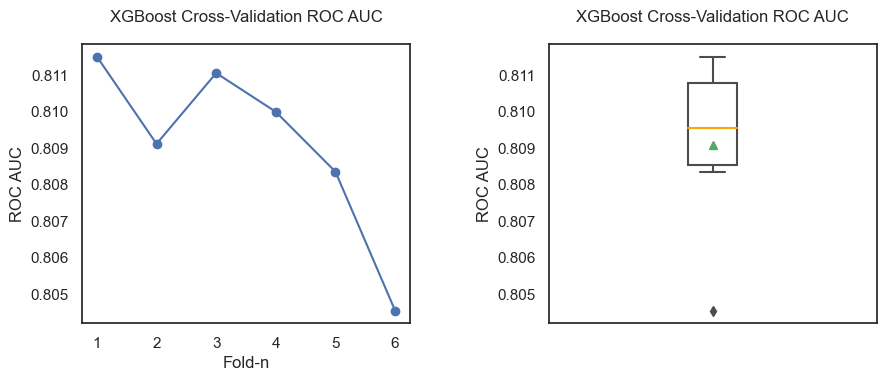

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

metric_label = 'ROC AUC'

# plotting line chart hasil ROC AUC cross-validation
axes[0].plot(range(1, 7), roc_auc_recap, marker='o')
axes[0].set_title(f'{chart} Cross-Validation {metric_label}', y=1.05)
axes[0].set_xlabel('Fold-n')
axes[0].set_ylabel(f'{metric_label}')

# plotting boxplot hasil ROC AUC cross-validation
sns.boxplot(data=roc_auc_recap, showmeans=True, width=0.15, boxprops={'facecolor': 'None'},
            medianprops={'color': 'orange'}, ax=axes[1])
axes[1].set_title(f'{chart} Cross-Validation {metric_label}', y=1.05)
axes[1].set_ylabel(f'{metric_label}')
axes[1].set_xticks([])

plt.tight_layout(pad=4)
plt.show()

## Result Recap

In [ ]:
# inisialisasi dataframe yang berisi recap hasil rata-rata metrik evaluasi yang diperoleh dari cross-validation
# sorting berdasarkan ROC_AUC
model_recap = pd.DataFrame({'Model': models, 'Accuracy': accuracy_model, 'Recall': recall_model,
                            'F1-Score': f1_model, 'ROC_AUC': ROC_AUC_model})
model_recap.sort_values(by='ROC_AUC', ascending=False).reset_index(drop=True)

,Model,Accuracy,Recall,F1-Score,ROC_AUC
0,Random Forest,0.815004,0.702024,0.786972,0.812490
1,XGBoost,0.811323,0.721992,0.788506,0.809088
2,Decision Tree,0.717446,0.721578,0.713646,0.718295
3,Logistic Regression,0.606950,0.598943,0.597517,0.606773
4,Naive Bayes,0.524608,0.067890,0.120357,0.513333


# Evaluation

## Hyperparameter Tuning

In [ ]:
# import library untuk GridSearchCV
from sklearn.model_selection import GridSearchCV

# inisialisasi dictionary parameter percobaan
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [1, 2],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2]
}

# inisialisasi model
RF_classifier = RandomForestClassifier(random_state=42)

# inisialisasi GridSearch dengan cross-validation sebanyak 4, dan metrik ROC AUC
# fitting dengan data train setelah sampling
grid_search = GridSearchCV(RF_classifier, param_grid, cv=4, scoring='roc_auc')
grid_search.fit(X_train_resampled, y_train_resampled)

# print best parameter dan best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# inisialiasi cv_scores
cv_scores = cross_val_score(grid_search.best_estimator_, X_train_resampled, y_train_resampled, cv=4, scoring='roc_auc')

# print cv_scores
print("Cross-Validation Scores:", cv_scores)
print("Mean ROC AUC:", cv_scores.mean())


Best Parameters: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.7891033373947175
Cross-Validation Scores: [0.67761614 0.74890183 0.8674703  0.86242508]
Mean ROC AUC: 0.7891033373947175


In [ ]:
# import library model Random Forest
from sklearn.ensemble import RandomForestClassifier

# inisialiasi dictionary dengan parameter terbaik hasil hyperparameter tuning
params = {
    'n_estimators': 100,
    'max_depth': 2,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

# inisialisais model Random Forest dengan parameter terbaik dan fitting dengan data train setelah sampling
RF_classifier = RandomForestClassifier(**params)
RF_classifier.fit(X_train_resampled, y_train_resampled)

y_pred = RF_classifier.predict(X_test)

# hitung recall, accuracy dan confusion matrix
recall = recall_score(y_test, y_pred)
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print hasil
print(f"Recall: {recall}")
print(f"Accuracy: {accurary}\n")

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))

print("="*55)
print("Confusion Matrix:\n\n", cm)

print("="*55)
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))

Recall: 0.420515574650913
Accuracy: 0.7866433975762569

Classification Report:

               precision    recall  f1-score   support

           0       0.94      0.82      0.88     84806
           1       0.17      0.42      0.24      7448

    accuracy                           0.79     92254
   macro avg       0.56      0.62      0.56     92254
weighted avg       0.88      0.79      0.82     92254

Confusion Matrix:

 [[69439 15367]
 [ 4316  3132]]
ROC AUC Score:  0.6196568864458017


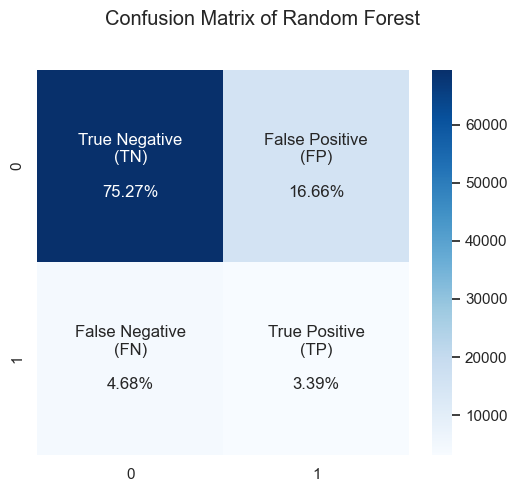

In [ ]:
# inisialisasi nama chart
chart = 'Random Forest'

# set lebar, tinggi dan judul chart
plt.figure(figsize=(6, 5))
plt.suptitle(f'Confusion Matrix of {chart}', y=1)

# inisialisasi TP, TN, FN, dan FP serta persentasenya
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_initial = ['(TN)','(FP)','(FN)','(TP)']
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

# inisialisasi label dengan TP, TN, FN, dan FP serta persentasenya
labels = [f"{v1}\n{v2}\n\n{v3}" for v1, v2, v3 in zip(group_names, group_initial, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# plotting heatmap confusion matrix
g = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

plt.show()

## Feature Importance

In [ ]:
# pisahkan X sebagai fitur dan y sebagai target
X = train.drop('TARGET', axis=1)
y = train['TARGET']

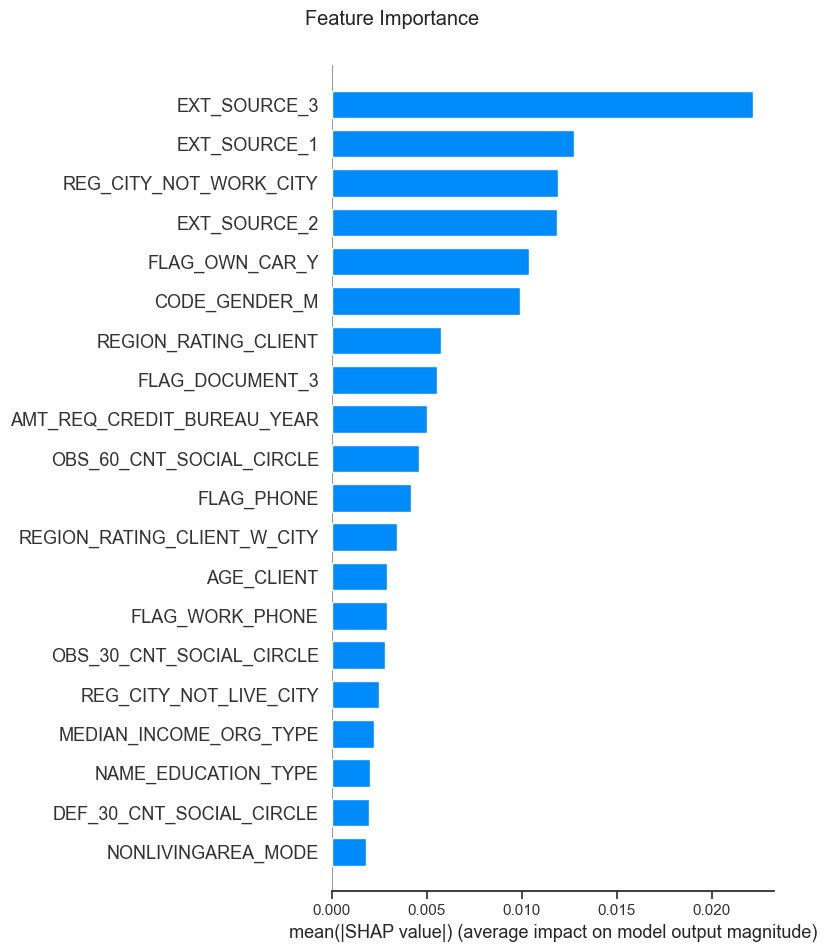

In [ ]:
# import shap untuk menentukan fitur paling penting
import shap

# inisialisasi explainer dengan model Random Forest, hitung shap value dan fitur terpenting
explainer = shap.TreeExplainer(RF_classifier)
shap_values = explainer.shap_values(X)
feature_importances = np.abs(shap_values).mean(axis=0)

plt.suptitle(f'Feature Importance', y=1)

# plotting hasil fitur terpenting
shap.summary_plot(feature_importances, X, plot_type='bar')
plt.show()

## Prediction

In [ ]:
# perform prediksi terhadap data train, kemudian inisialisasi sebagai dataframe
predictions = RF_classifier.predict(train.drop('TARGET', axis=1))
predictions = pd.DataFrame({'Prediction': predictions})
predictions.head()

# gabung hasil prediksi dan train, buat fitur baru Actual dan Predicted
result = pd.concat([predictions, train], axis=1)
result.rename(columns = {'TARGET': 'Actual', 'Prediction': 'Predicted'}, inplace=True)

# inisialisasi list fitur yang akan digunakan dalam dashboard
columns = ['Predicted', 'Actual', 'AGE_CLIENT', 'AMT_CREDIT', 'AMT_ANNUITY',
           'CODE_GENDER_M', 'NAME_CONTRACT_TYPE_Revolving loans', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_Y',
           'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
           'OCCUPATION_TYPE']
result = result[columns]
result.head()

,Predicted,Actual,AGE_CLIENT,AMT_CREDIT,AMT_ANNUITY,CODE_GENDER_M,NAME_CONTRACT_TYPE_Revolving loans,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
0,1,1,26,406597.5,24700.5,1.0,0.0,0.0,1.0,7.0,4.0,3.0,1.0,0.179460
1,0,0,46,1293502.5,35698.5,0.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,0.089655
2,0,0,52,135000.0,6750.0,1.0,1.0,1.0,1.0,7.0,4.0,3.0,1.0,0.179460
3,0,0,52,312682.5,29686.5,0.0,0.0,0.0,1.0,7.0,4.0,0.0,1.0,0.179460
4,1,0,55,513000.0,21865.5,1.0,0.0,0.0,1.0,7.0,4.0,3.0,1.0,0.089655


In [ ]:
# proses untuk mapping variabel kategori menjadi nilai asal
# misal 0 dan 1 diubah menjadi No dan Yes

result['Default Status'] = result['Actual'].apply(lambda value: 'Default' if value == 1 else 'Non-default')


result['Gender'] = result['CODE_GENDER_M'].apply(lambda value: "Female" if value == 0 else \
                                                 "Male" if value == 1 else "Unknown")
result.drop('CODE_GENDER_M', axis=1, inplace=True)


result['Contract Type'] = result['NAME_CONTRACT_TYPE_Revolving loans'].apply(lambda value: "Cash Loans" if value == 0 \
                                                                             else "Revolving Loans" if value == 1 else "Unknown")
result.drop('NAME_CONTRACT_TYPE_Revolving loans', axis=1, inplace=True)


result['Own Car'] = result['FLAG_OWN_CAR_Y'].apply(lambda value: "No" if value == 0 else \
                                                 "Yes" if value == 1 else "Unknown")
result.drop('FLAG_OWN_CAR_Y', axis=1, inplace=True)


result['Own Realty'] = result['FLAG_OWN_REALTY_Y'].apply(lambda value: "No" if value == 0 else \
                                                 "Yes" if value == 1 else "Unknown")
result.drop('FLAG_OWN_REALTY_Y', axis=1, inplace=True)


result['Income Type'] = result['NAME_INCOME_TYPE'].apply(lambda value: "Businessman" if value == 0 else "Commercial Associate" \
                                                 if value == 1 else "Maternity Leave" if value == 2 else \
                                                 "Pensioner" if value == 3 else "State Servant" if \
                                                 value == 4 else "Student" if value == 5 else \
                                                 "Unemployed" if value == 6 else "Working")
result.drop('NAME_INCOME_TYPE', axis=1, inplace=True)


result['Education Level'] = result['NAME_EDUCATION_TYPE'].apply(lambda value: "Academic Degree" if value == 0 else \
                                                                "Higher Education" if value == 1 else "Incomplete Degree" if \
                                                                value == 2 else "Lower Secondary" if value == 3 \
                                                                else "Secondary")
result.drop('NAME_EDUCATION_TYPE', axis=1, inplace=True)


result['Family Status'] = result['NAME_FAMILY_STATUS'].apply(lambda value: "Civil Marriage" if value == 0 else "Married" \
                                                             if value == 1 else "Separated" if value == 2 else \
                                                             "Single" if value == 3 else "Widow")
result.drop('NAME_FAMILY_STATUS', axis=1, inplace=True)

result['Housing Type'] = result['NAME_HOUSING_TYPE'].apply(lambda value: "Co-op Apartment" if value == 0 else "House or Apartment" \
                                                           if value == 1 else "Municipal Apartment" if value == 2 else \
                                                           "Office Apartment" if value == 3 else "Rented Apartment" \
                                                           if value == 4 else "With Parents")
result.drop('NAME_HOUSING_TYPE', axis=1, inplace=True)


result['Occupation Type'] = result['OCCUPATION_TYPE'].apply(lambda value: "Unknown" if value == 0.31345545362604915 else \
                                                            "Laborers" if value == 0.1794602469505156 else "Sales staff" if \
                                                            value == 0.10439301358325394 else "Core staff" if value == 0.08965532940285063 \
                                                            else "Managers" if value == 0.0694967009310236 else "Drivers" \
                                                            if value == 0.06049539691263077 else "High skill tech staff" if value == 0.037006806260589054 \
                                                            else "Accountants" if value == 0.031911053588326924 else "Medicine staff" \
                                                            if value == 0.02776160852782502 else "Security staff" if value == 0.02185612872385053 \
                                                            else "Cooking staff" if value == 0.019335893675348197 else "Cleaning staff" \
                                                            if value == 0.015131166039588828 else "Private service staff" if value == 0.008624081740165393 \
                                                            else "Low-skill Laborers" if value == 0.006806260589052099 else "Waiters/barmen staff" \
                                                            if value == 0.0043835830262982465 else "Secretaries" if value == 0.004243750630058762 \
                                                            else "Realty agents" if value == 0.0024421890599035483 else "HR staff" \
                                                            if value == 0.001830828815879757 else "IT staff")

result.drop('OCCUPATION_TYPE', axis=1, inplace=True)

# ubah nama fitur dataframe
result.rename(columns = {'AGE_CLIENT': 'Age', 'AMT_CREDIT': 'Credit Amount',
                               'AMT_ANNUITY': 'Annuity Amount'}, inplace=True)

# export dataframe menjadi csv yang akan digunakan dalam dashboard
result.to_csv('result.csv', index=False)

result.head()

,Predicted,Actual,Age,Credit Amount,Annuity Amount,Default Status,Gender,Contract Type,Own Car,Own Realty,Income Type,Education Level,Family Status,Housing Type,Occupation Type
0,1,1,26,406597.5,24700.5,Default,Male,Cash Loans,No,Yes,Working,Secondary,Single,House or Apartment,Laborers
1,0,0,46,1293502.5,35698.5,Non-default,Female,Cash Loans,No,No,State Servant,Higher Education,Married,House or Apartment,Core staff
2,0,0,52,135000.0,6750.0,Non-default,Male,Revolving Loans,Yes,Yes,Working,Secondary,Single,House or Apartment,Laborers
3,0,0,52,312682.5,29686.5,Non-default,Female,Cash Loans,No,Yes,Working,Secondary,Civil Marriage,House or Apartment,Laborers
4,1,0,55,513000.0,21865.5,Non-default,Male,Cash Loans,No,Yes,Working,Secondary,Single,House or Apartment,Core staff
